<a href="https://colab.research.google.com/github/chandrugunaruthvi/hello-world/blob/main/Chandru_NLP_Capstone_Project_Milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Capstone Project - EHS Chatbot on Accident Level Prediction**

## **Initial Set-ups for Colab**

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#Set your project path 
project_path =  "/content/drive/MyDrive/AIML/Capstone Project/"

##**Import necessary libraries for EDA**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import os,re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize,stem
import nltk
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS

##**Reading and Exploring the Data**

### **Loading & Reading Data**

In [5]:
df = pd.read_csv(project_path+"IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,01-01-16 00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,02-01-16 00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,06-01-16 00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,08-01-16 00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,10-01-16 00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


### **Data attributes**

In [6]:
df.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

In [7]:
df.shape

(425, 11)



> **There are 11 columns that includes unnamed**

> **There are 425 datasets**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB




> **All attributes are Object type. Unnamed have no relevancy and can be dropped**



### **Drop 'Unnamed' first column**

In [9]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.shape

(425, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      425 non-null    object
 1   Countries                 425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Genre                     425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


### **Rename & Correct the column names for ease of referrence**

In [11]:
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Local':'Locality', 'Industry Sector':'Sector', 'Genre':'Gender', 'Employee or Third Party':'Employee type', 'Critical Risk':'Risk Type'}, inplace=True)
df.head()

,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description
0,01-01-16 00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-16 00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,06-01-16 00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,08-01-16 00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,10-01-16 00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


### **Check for missing values**

In [12]:
# Checking Null colunms
df_null = df.isnull().sum()
df_null

Date                        0
Country                     0
Locality                    0
Sector                      0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Risk Type                   0
Description                 0
dtype: int64

> **There is no missing data in given dataset. Hence no need to process missing values**

### **Unique Values in each attributes**

In [13]:
df.nunique()

Date                        287
Country                       3
Locality                     12
Sector                        3
Accident Level                5
Potential Accident Level      6
Gender                        2
Employee type                 3
Risk Type                    33
Description                 411
dtype: int64

In [14]:
for column in df.columns[1:9]:
    print(column, " : ", len(df[column].unique()), "Unique Values")
    print(df[column].unique())
    print('-------------')

Country  :  3 Unique Values
['Country_01' 'Country_02' 'Country_03']
-------------
Locality  :  12 Unique Values
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']
-------------
Sector  :  3 Unique Values
['Mining' 'Metals' 'Others']
-------------
Accident Level  :  5 Unique Values
['I' 'IV' 'III' 'II' 'V']
-------------
Potential Accident Level  :  6 Unique Values
['IV' 'III' 'I' 'II' 'V' 'VI']
-------------
Gender  :  2 Unique Values
['Male' 'Female']
-------------
Employee type  :  3 Unique Values
['Third Party' 'Employee' 'Third Party (Remote)']
-------------
Risk Type  :  33 Unique Values
['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention

### **Process the Date column and add columns for the day, weekday, month, quarter to evaluate any accident levels relations with periods across every year**

In [15]:
df['Date'] = pd.to_datetime(df['Date']) #To consider the column as Date time series
df['Year'] = df['Date'].apply(lambda x : x.year) #Extract the year of that incident as separate column
df['Month'] = df['Date'].apply(lambda x : x.month) #Extract the month of that incident as separate column
df['Day'] = df['Date'].apply(lambda x : x.day) #Extract the day the incident occured in the month as separate column
df['Weekday'] = df['Date'].apply(lambda x : x.day_name()) #Extract the Weekday of the incident date as separate column
df['WeekofYear'] = df['Date'].apply(lambda x : x.weekofyear) #Extract the week of the incident in the year as separate column

In [16]:
df.head()

,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-02-01,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday,5
2,2016-06-01,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,22
3,2016-08-01,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,8,1,Monday,31
4,2016-10-01,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,10,1,Saturday,39


**In general the Season or Weather also a major contributor for any incidents, like Winter invite cold related issues, Summer invite hot stroke related health and safety concers, Monsoon invite slippery kind of safety issues, etc**

**Let's develop the column that identify season when incident occured**

**The data is collected from Brazil which is located in the Southern Hemisphere, its seasons are the exact opposite of what Northern Hemisphere residents.**
> **Summer** is December through Febraury

> **Autumn** is March through May

> **Winter** is June through August

> **Spring** is Septemner through November

>  Within the country the climate varies considerably from region to region.

**Create the season column based on the month column that was extracted from the date of incident**

In [17]:
#Define the function to create seasons from month
def m2s(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [18]:
#Creast the column Season passing the 'Month' data in above defined m2s function.
df['Season'] = df['Month'].apply(m2s)
df.head()

,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
1,2016-02-01,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday,5,Summer
2,2016-06-01,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,22,Winter
3,2016-08-01,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,8,1,Monday,31,Winter
4,2016-10-01,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,10,1,Saturday,39,Spring


**Let's consider Quarter of the calender also plays the role in incidents**

In [19]:
#Define the function to create Quarter of the year from month
def m2q(x):
    if x in [1, 2, 3]:
        quarter = 'Q1'
    elif x in [4,5,6]:
        quarter = 'Q2'
    elif x in [7,8,9]:
        quarter = 'Q3'
    elif x in [10,11,12]:
        quarter = 'Q4'
    return quarter

In [20]:
#Creast the column Quarter passing the 'Month' data in above defined m2q function.
df['Quarter'] = df['Month'].apply(m2q)
df.head()

,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear,Season,Quarter
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,Q1
1,2016-02-01,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday,5,Summer,Q1
2,2016-06-01,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,22,Winter,Q2
3,2016-08-01,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,8,1,Monday,31,Winter,Q3
4,2016-10-01,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,10,1,Saturday,39,Spring,Q4


## **EDA**

### **Univariate Analysis**

In [21]:
# function for distribution, frequency plot
def UniPlot(aCol):
    aBar = df[aCol]
    aSeries = df.groupby(aCol)['Accident Level'].count()
    aLabel = aSeries.keys()  #df_accidents[aCol]
    aUnique = df[aCol].nunique()
    
    plt.figure(figsize= (24,14))
    
    # bar char showing count
    plt.subplot(1, 2, 1)
    plt.title(aCol + ' Count', {'fontsize': 16, 'fontweight' : 'bold',  'color' : 'purple'})
    plt.xlabel(aCol, {'fontsize': 16, 'fontweight' : 'bold',  'color' : 'blue'})
    plt.ylabel('Total number of Accidents', {'fontsize': 16, 'fontweight' : 'bold',  'color' : 'green'})
    ax = sns.countplot(aBar, data=df)    
    plt.tick_params(labelsize=13)
    plt.xticks(rotation=45)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    # pie chart showing percentage
    plt.subplot(1, 2, 2)
    plt.title(aCol + ' Percentage', {'fontsize': 16, 'fontweight' : 'bold',  'color' : 'purple'})
    plt.pie(aSeries, autopct="%1.1f%%", explode=[0.04]*aUnique, labels=aLabel, pctdistance=0.8, shadow=True, startangle=90, counterclock=False, textprops={'fontsize': 14, 'fontweight' : 'bold',  'color' : 'white'},labeldistance=0.5)
    # plt.pie(aSeries, autopct="%1.1f%%", explode=[0.04]*aUnique, labels=aLabel, pctdistance=0.5, shadow=True, rotatelabels =False, startangle=180, counterclock=True)
    plt.axis('equal')
    

    plt.show()

ANALYSIS BY Country:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


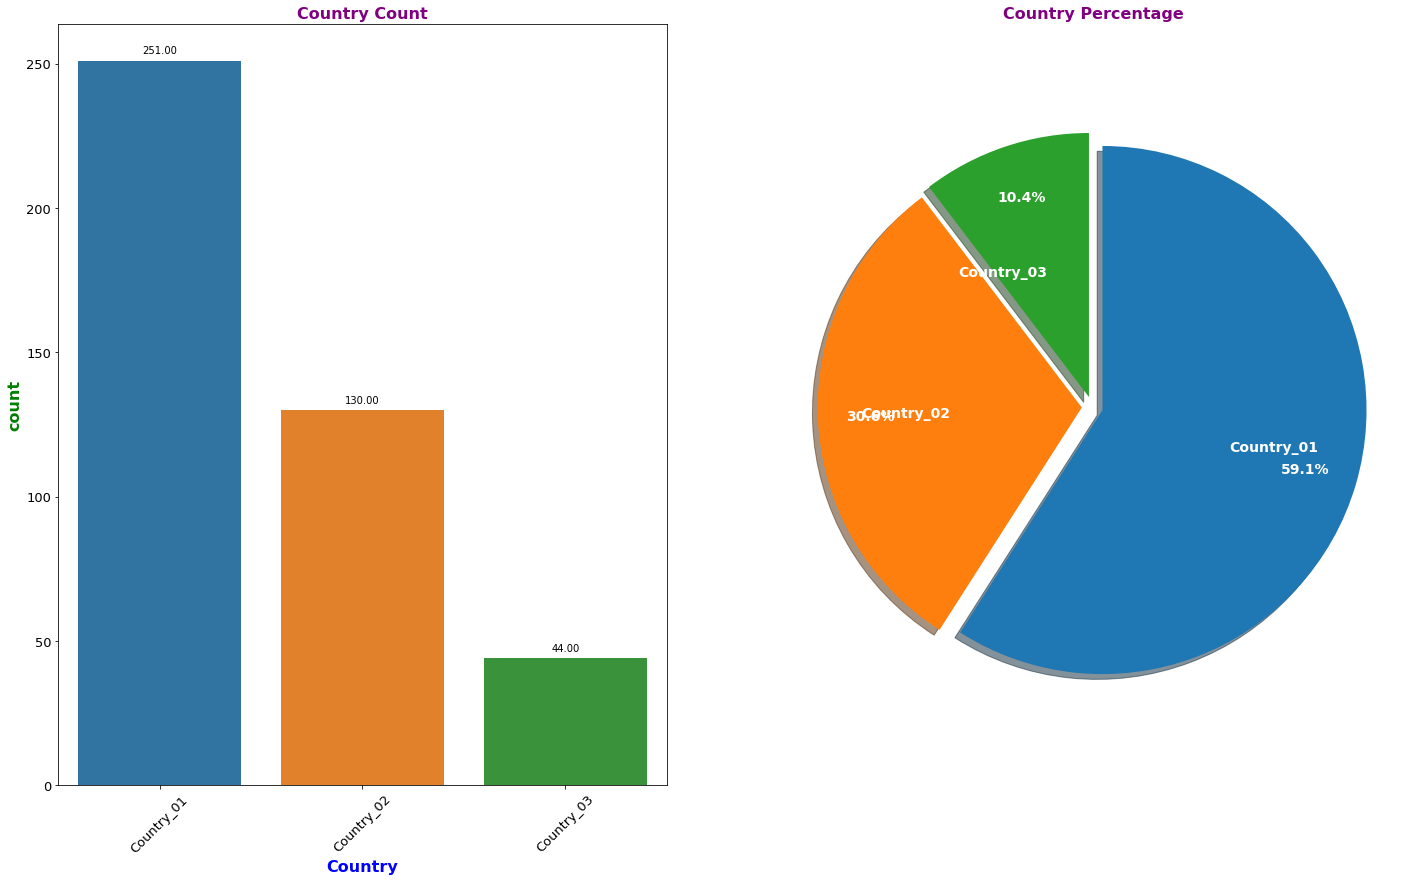

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Locality:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


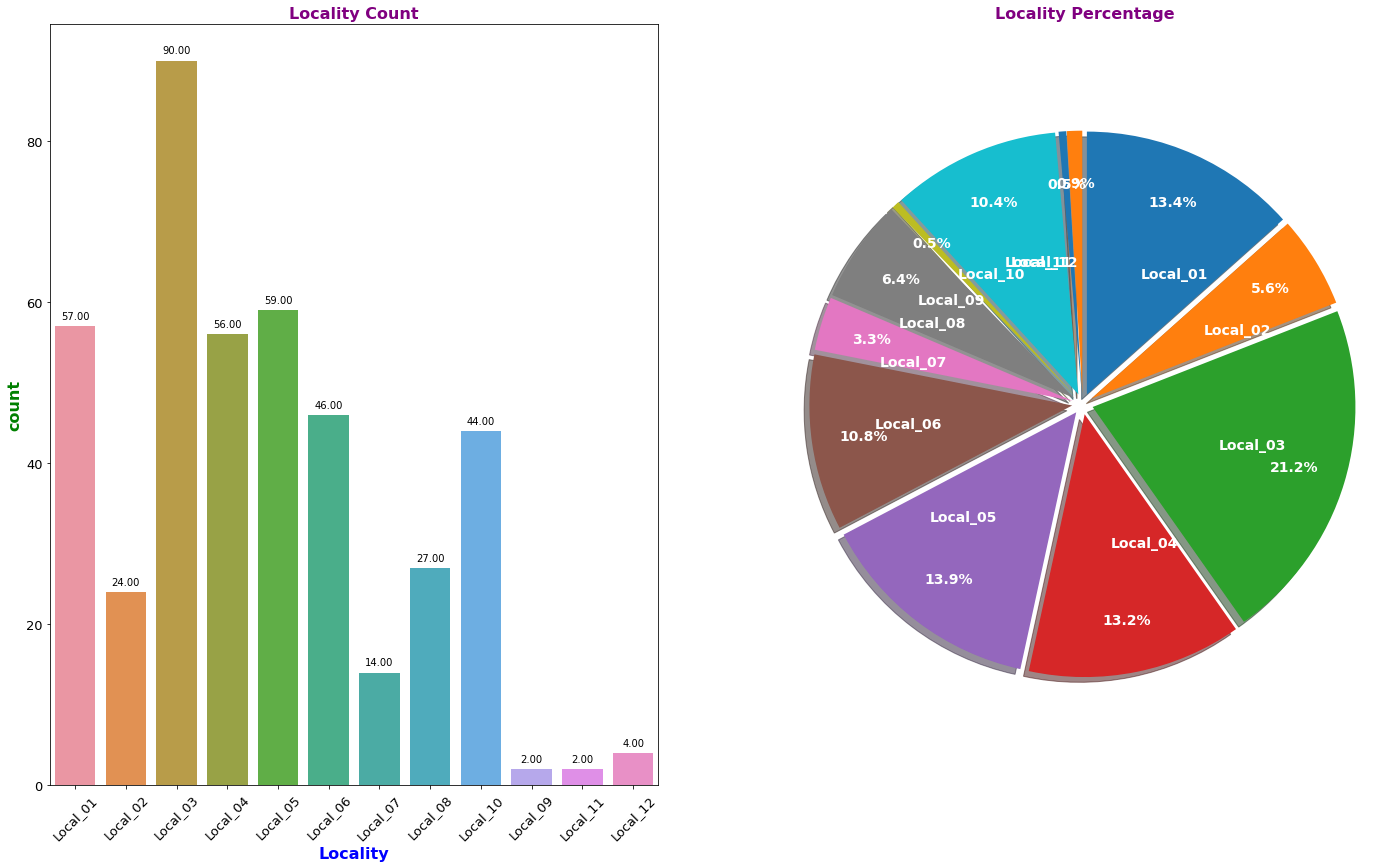

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Sector:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


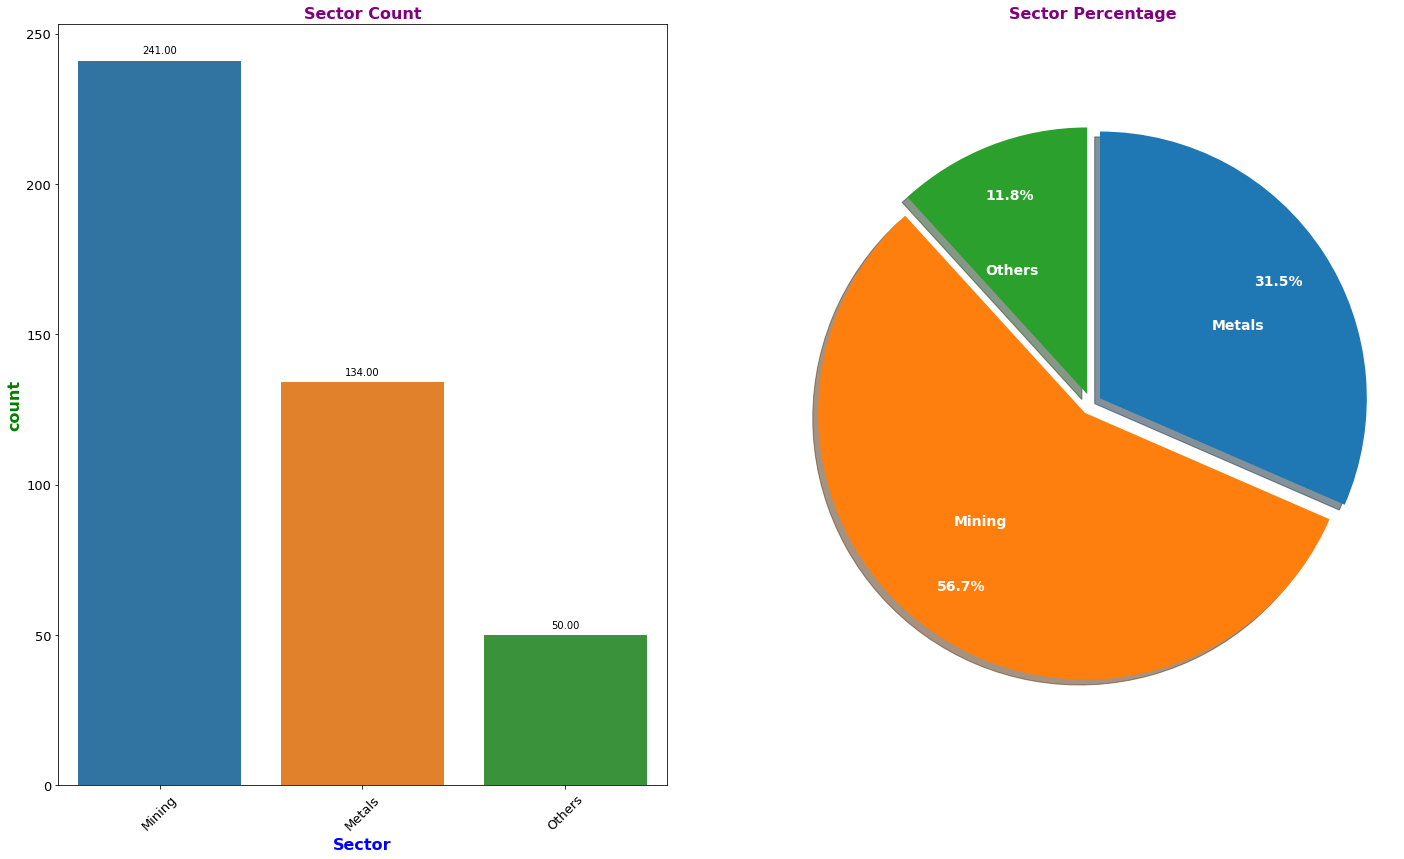

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Accident Level:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


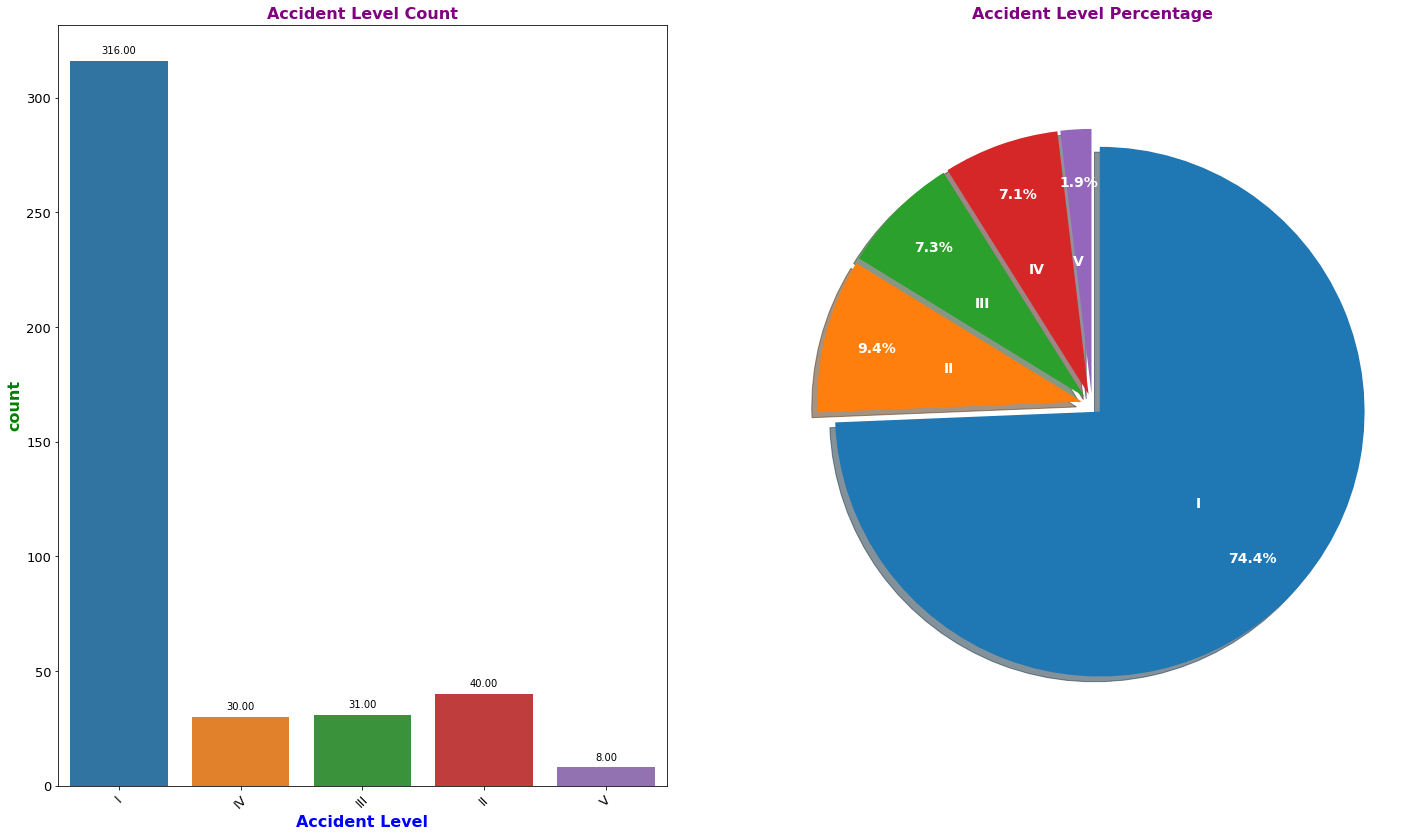

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Potential Accident Level:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


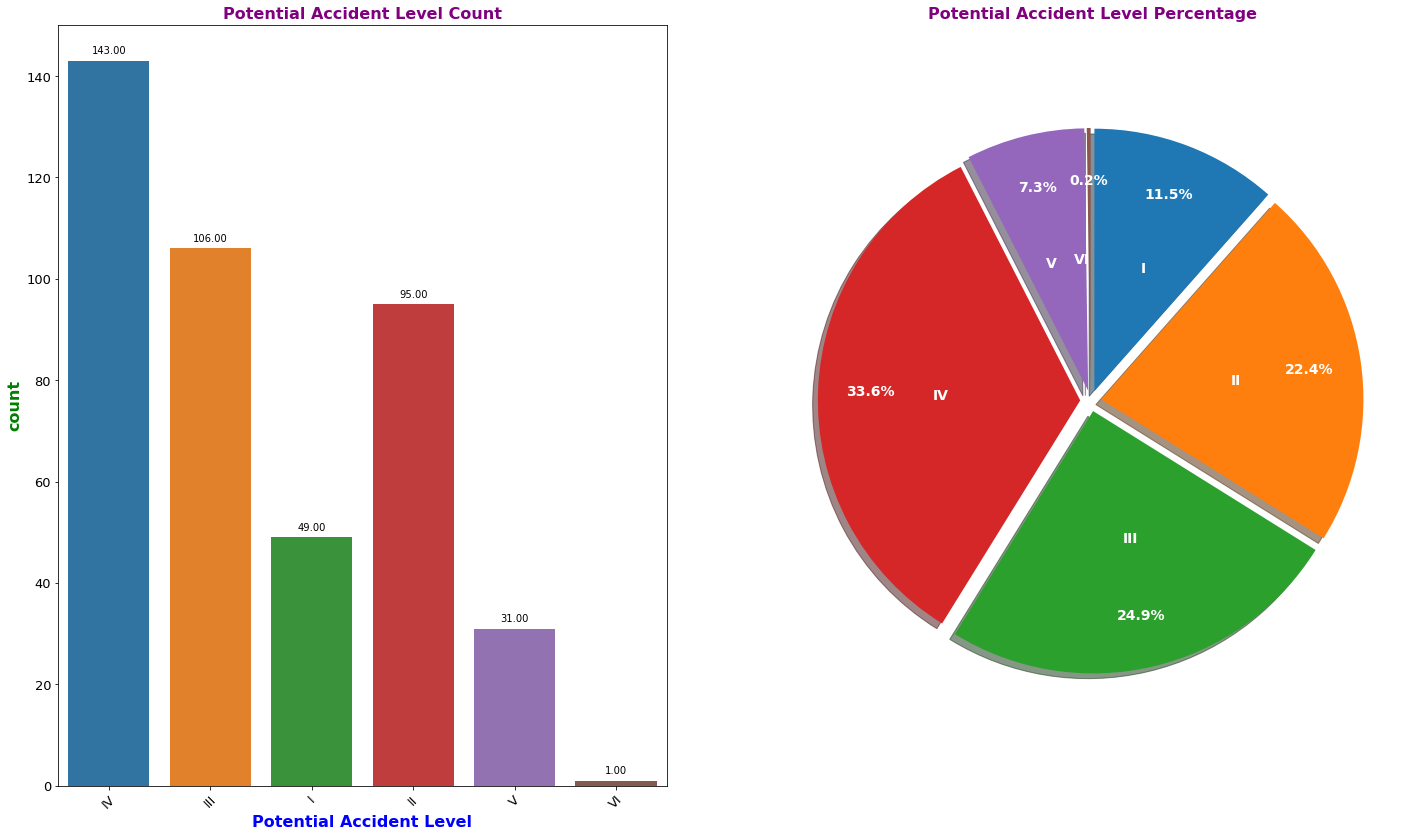

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Gender:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


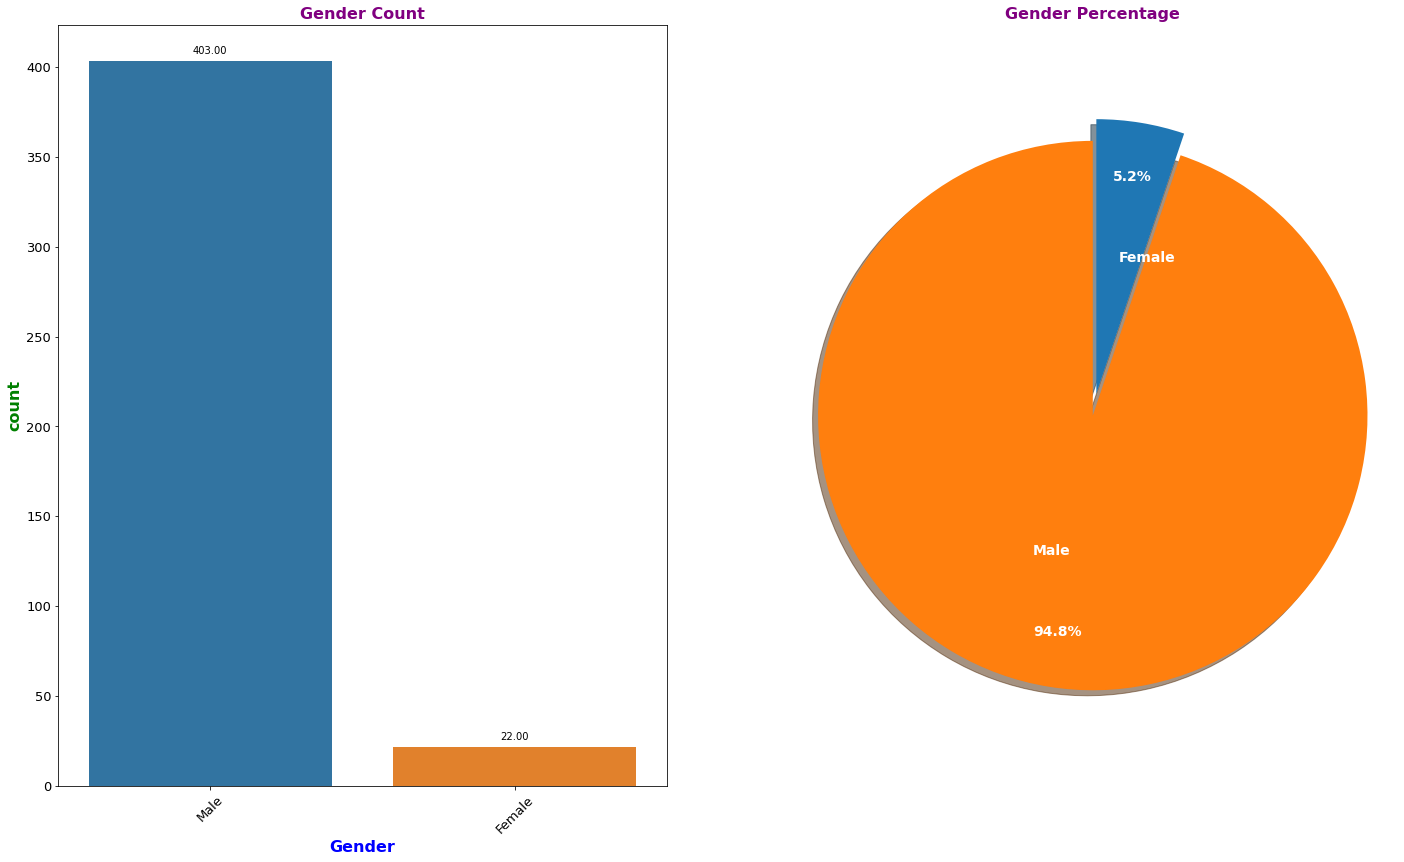

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Employee type:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


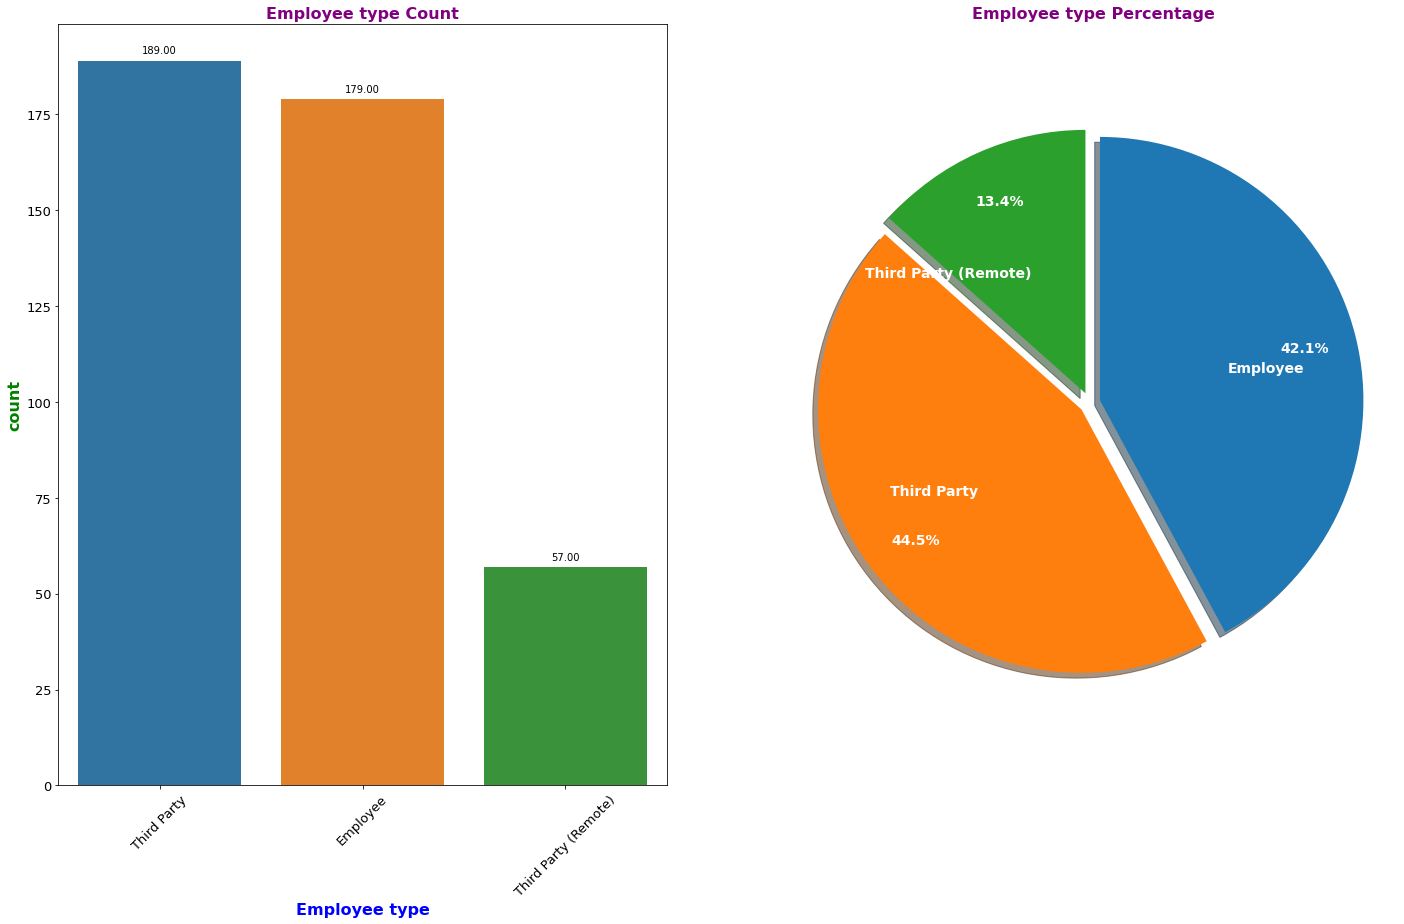

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Risk Type:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


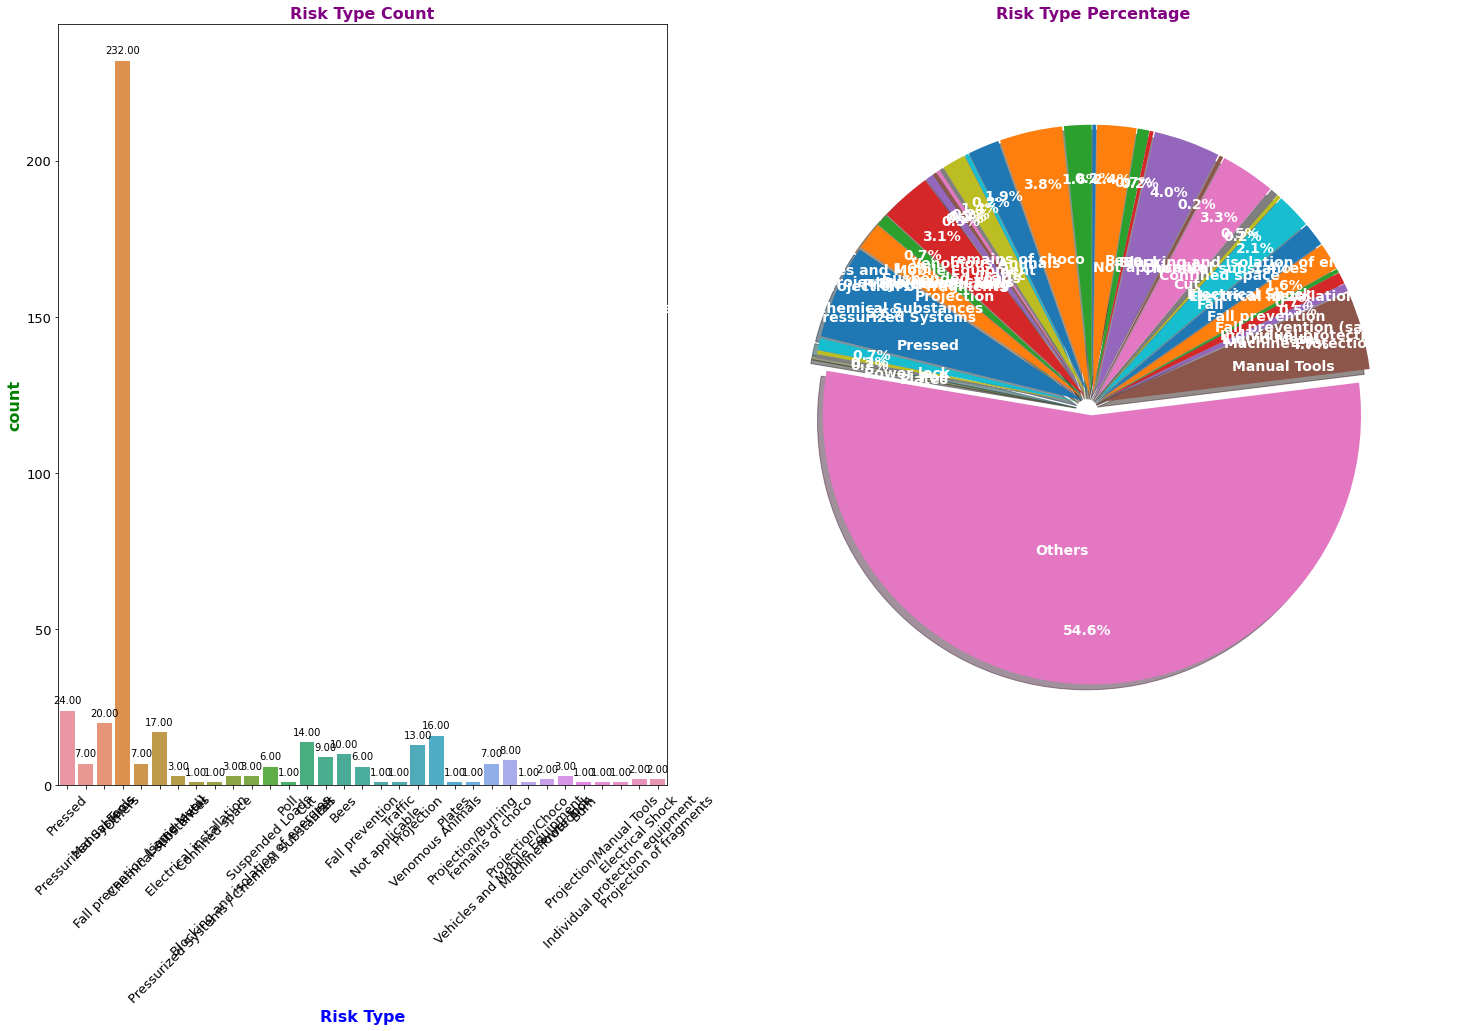

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Year:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


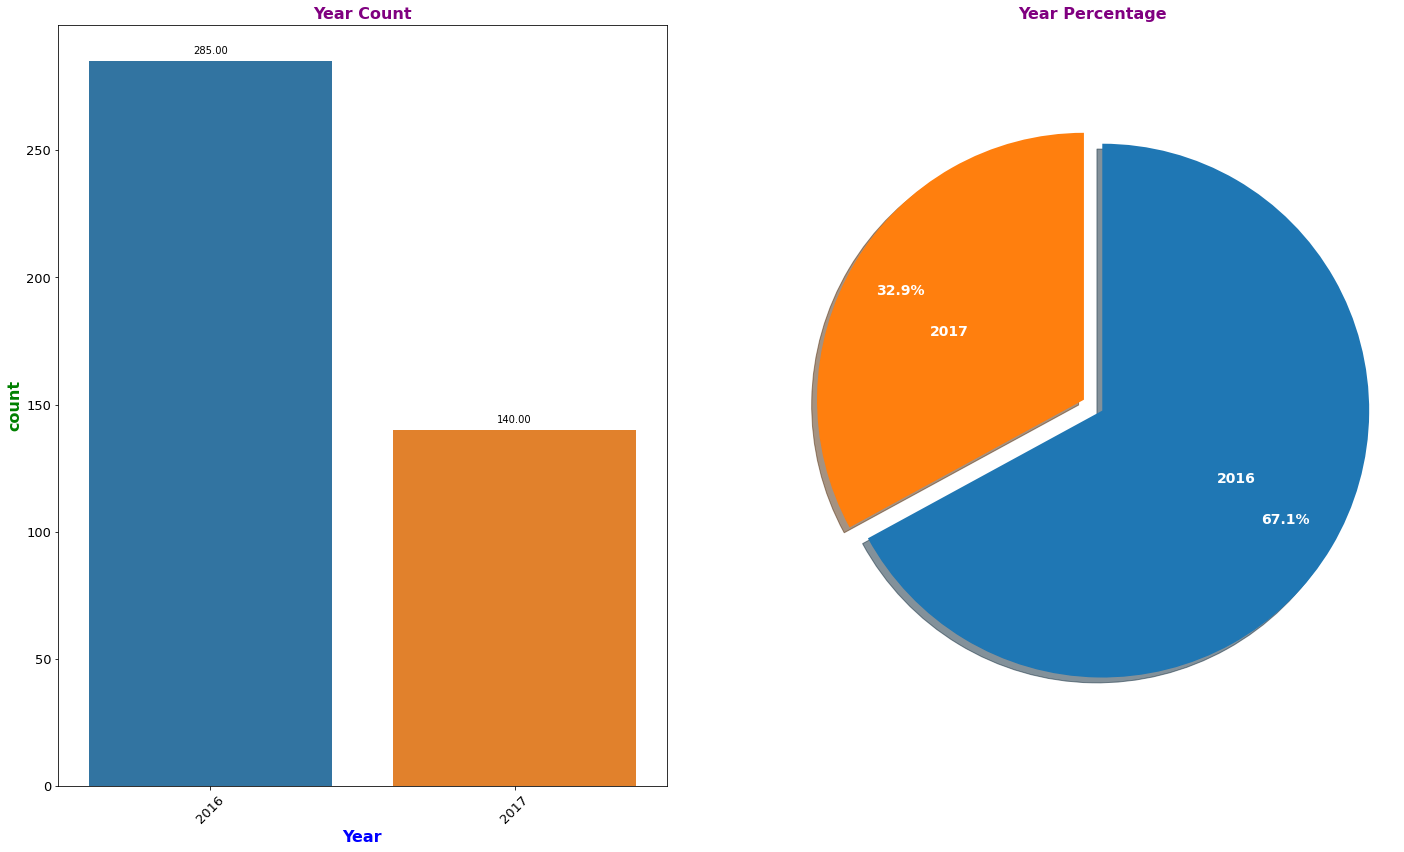

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Month:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


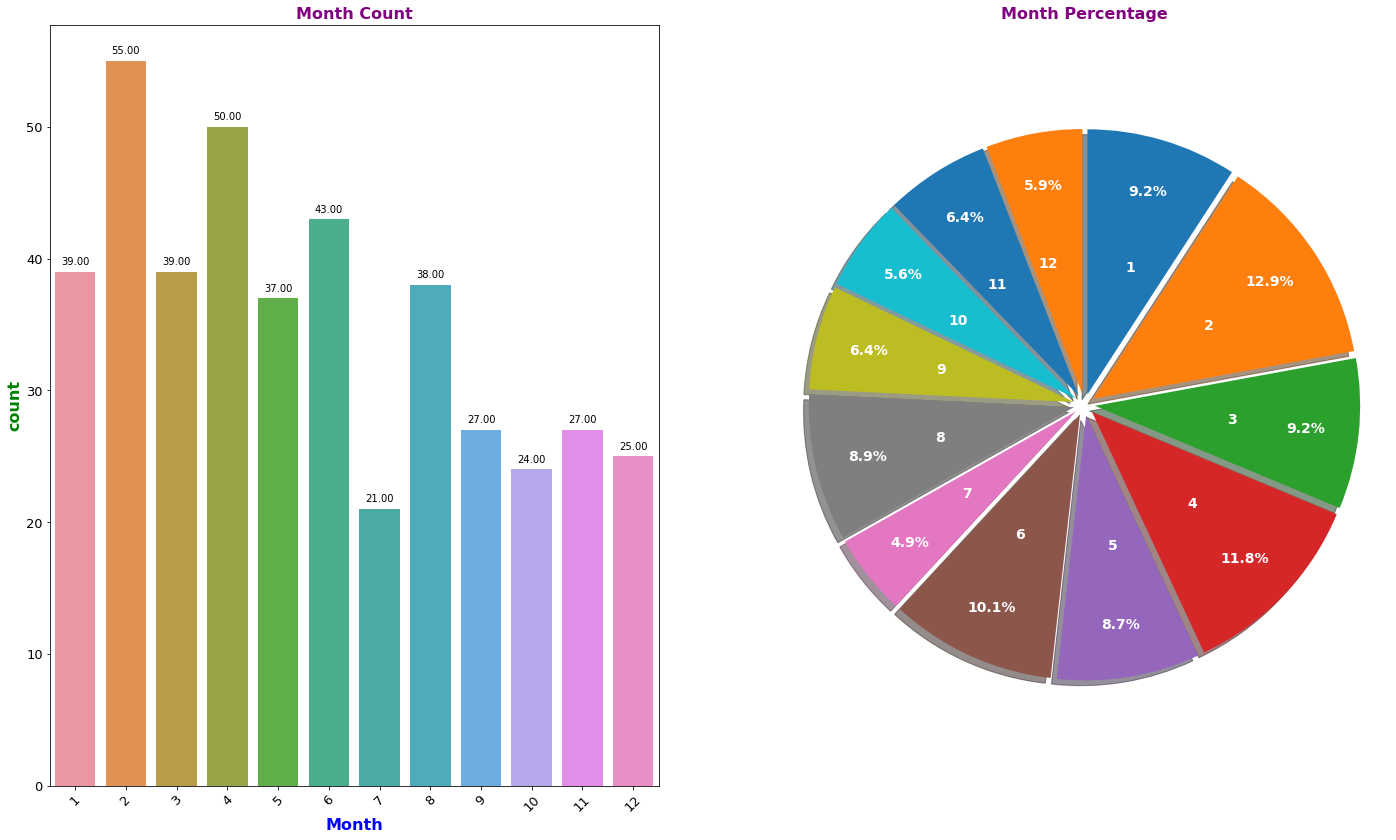

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Day:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


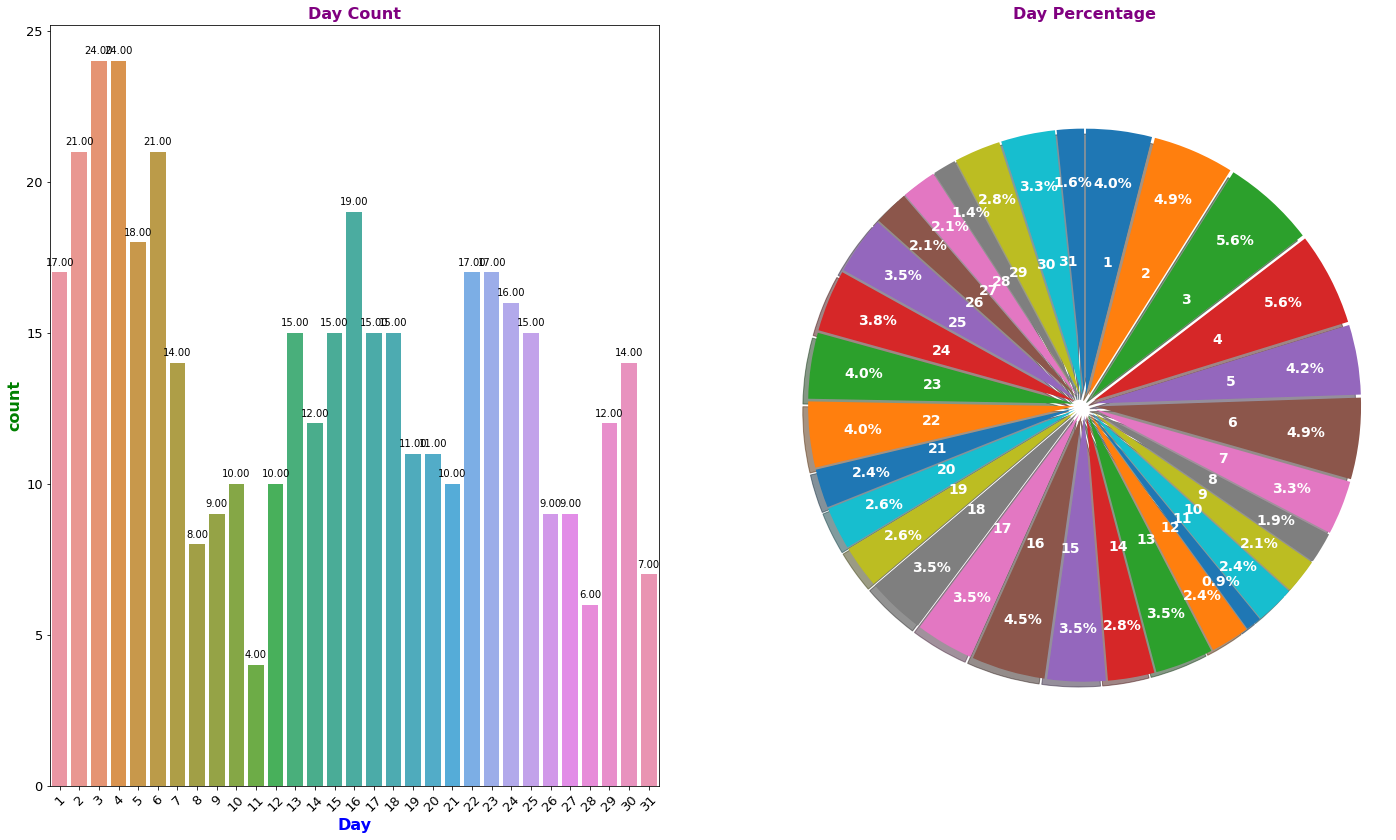

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Weekday:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


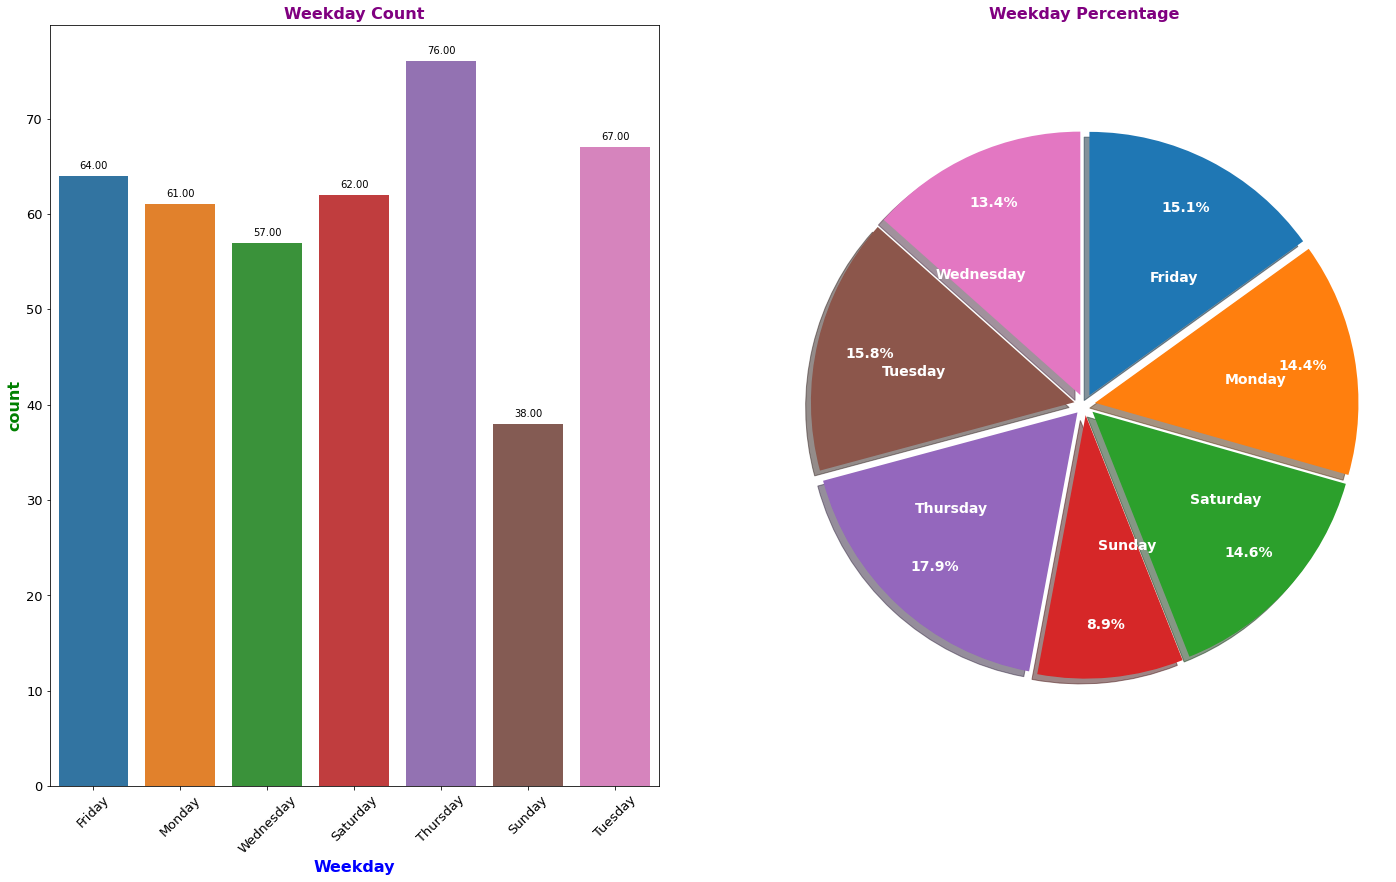

-----------------------------------------------------------------------------------------------------
ANALYSIS BY WeekofYear:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


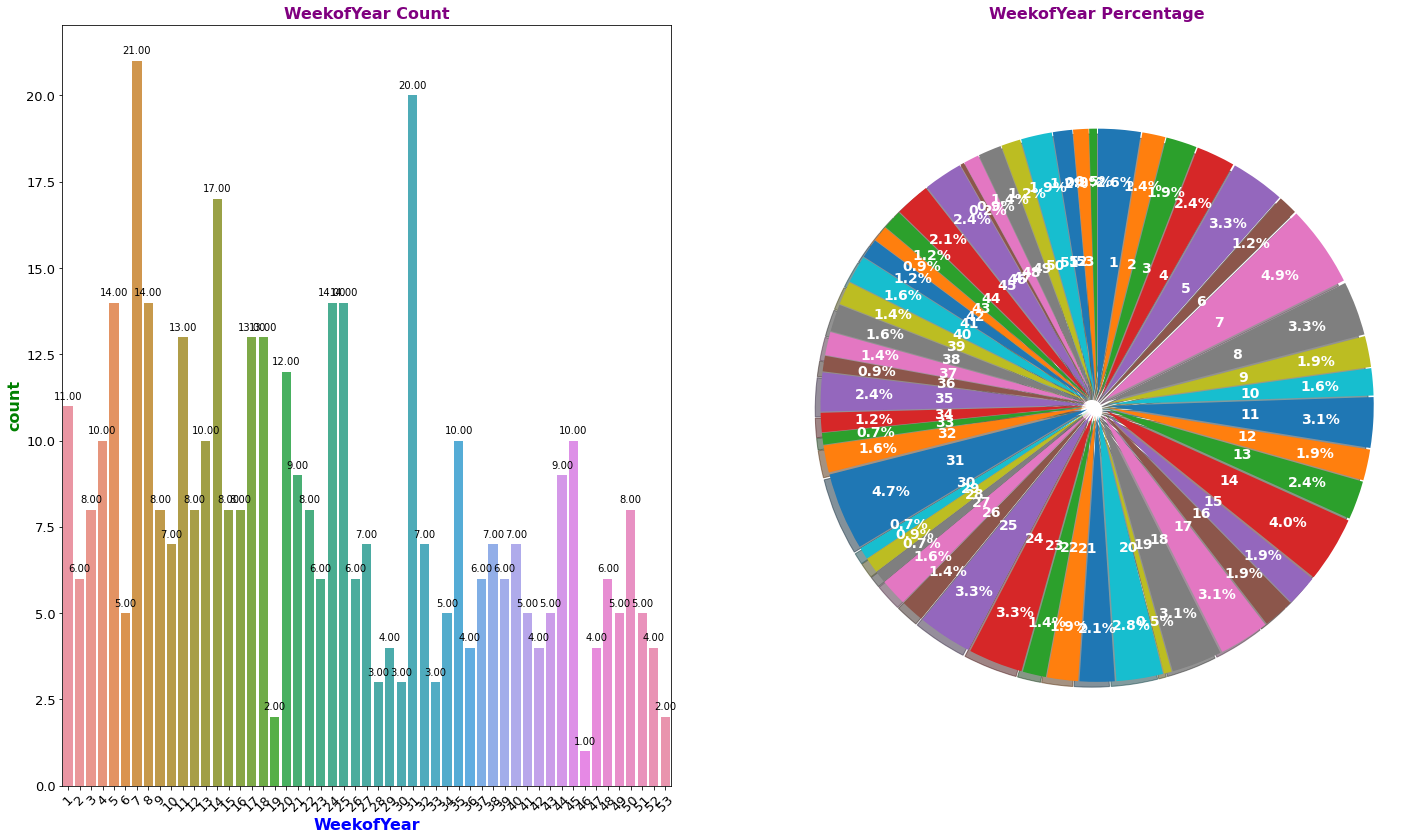

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Season:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


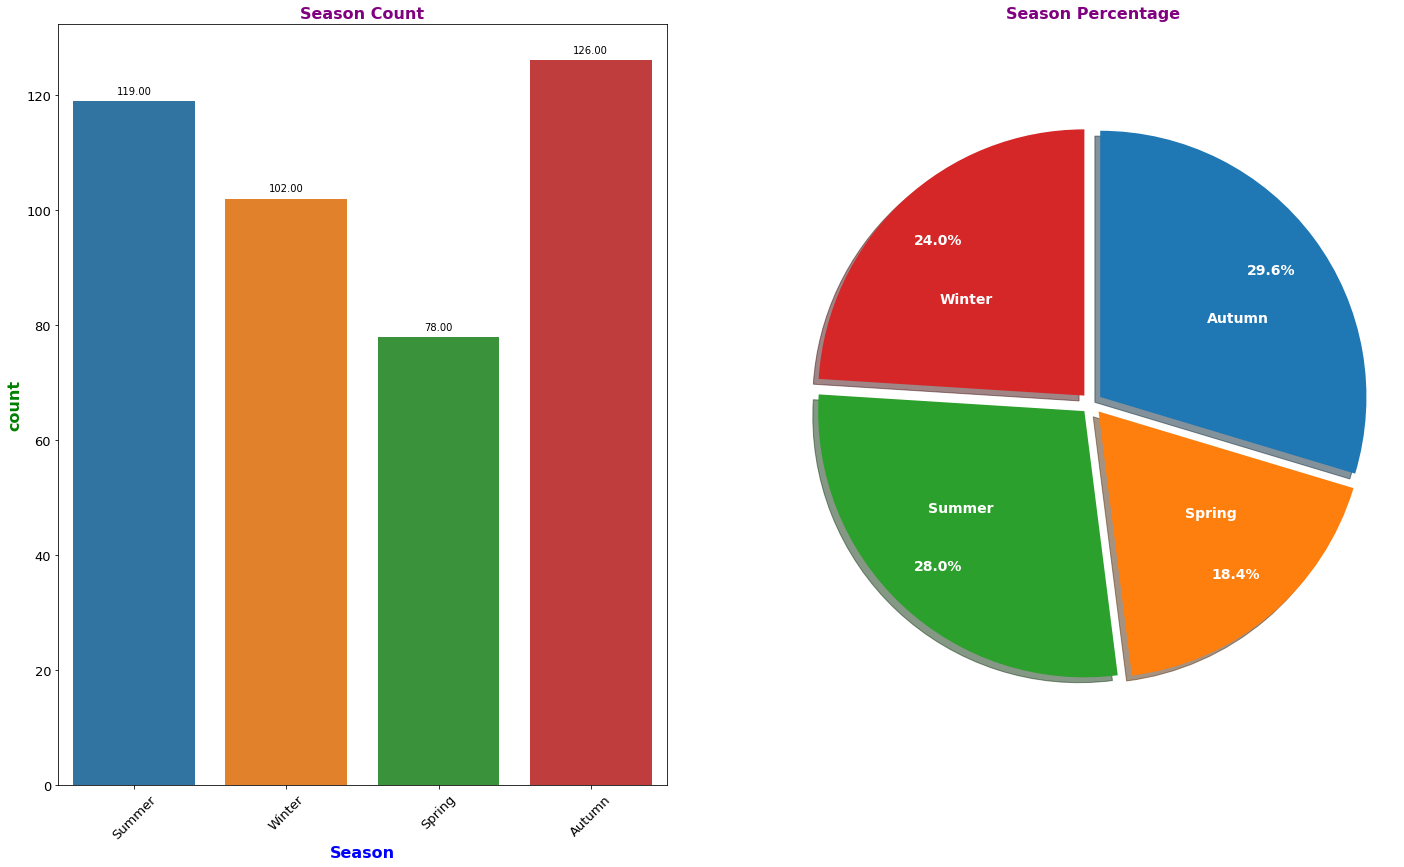

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Quarter:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


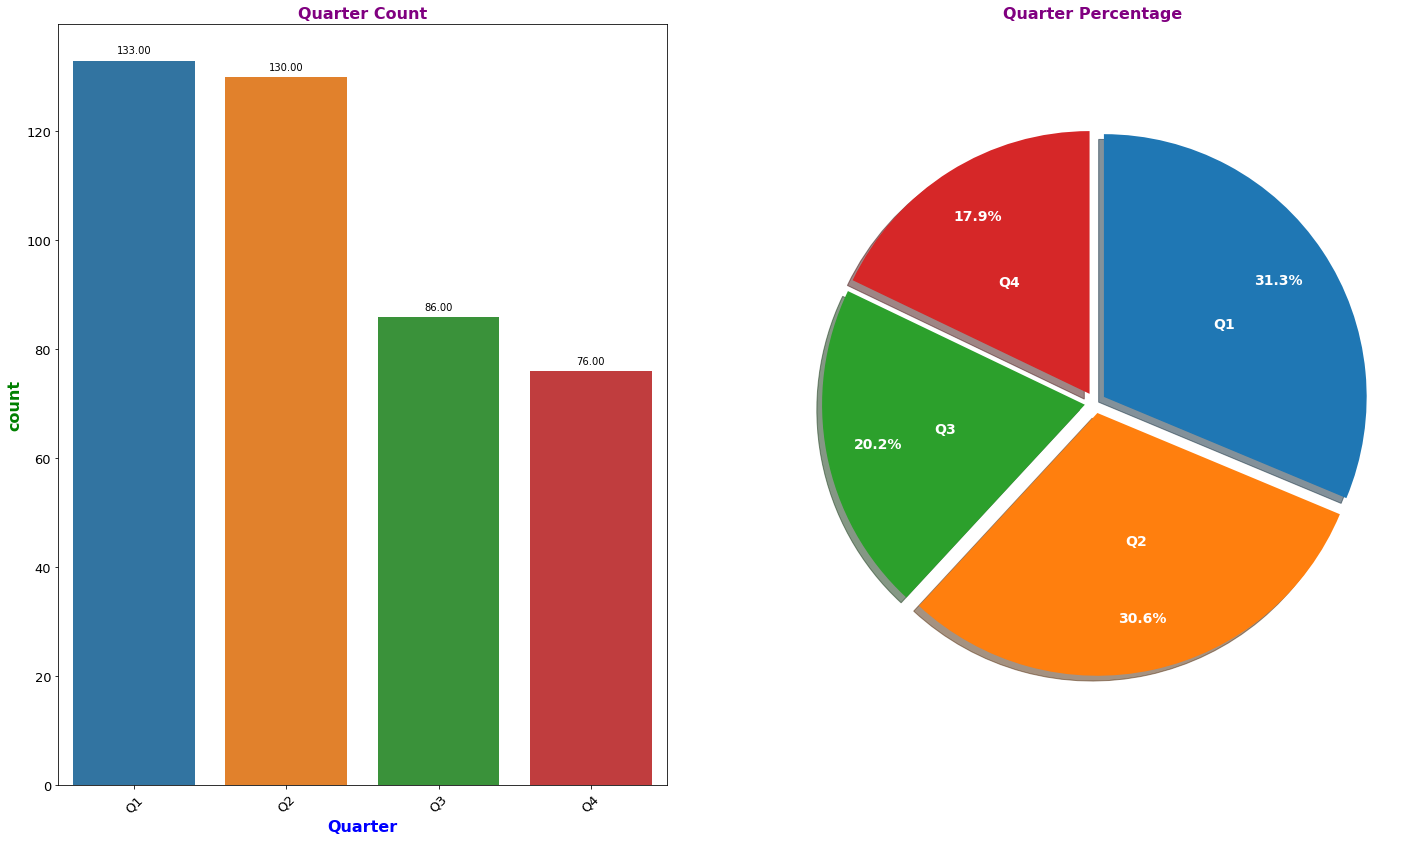

-----------------------------------------------------------------------------------------------------


In [22]:
for column in ['Country', 'Locality', 'Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee type', 'Risk Type',
       'Year', 'Month', 'Day', 'Weekday', 'WeekofYear',
       'Season', 'Quarter']:
    print('ANALYSIS BY ' + column + ':')
    UniPlot(column)
    print('-----------------------------------------------------------------------------------------------------')

### **Univariate Analysis Summary**

> **Total 3 countries data available**

> **Country_01 recorded with highest incident (59%) amongst all 3 countries**

> **Country_01 recorded lowest (10.4%) amongst all 3 countires**


> **Total 12 localities data from 3 countries captured**

> **Local_03 recorded with highest incident amongst all 12 countries**

> **9 out of 12 localities have double digit incidents**

> **3 localities have single digit low incidents**


> **Total 3 Industrial sectors covered**

> **Mining recorded with highest incident - 56.7%**

> **Metals stands high next to Mining Sector - 31.5%**

> **Other sectors contribute lowest incidents - 11.8%**


> **Accident Level - I occured at high frequency 74.4%**

> **Accident Level - V occured at low frequency 1.9%**

> **High Level accidents are lower and Low Level accidents are higher**

> **Predicted Potential Accident Level - IV is at high frequency 33.6%**

> **Predicted Potential Accident Level - VI is just 1 occasio - 0.2%**

> **Actual Accident levels are different than Predicted Potential Accident Level**

> **Males are high prone to exposed to Accident (94.8% compare to Females (5.2%)**

> **Third Party Employees and Direct Employees are more prone to Accident than Remote working third party**

> **Accidents are categories into 33 types of Risk Types**

> **Undefined other type of Risks contribute to 54.6% accident**

> **It indicates deep investigation and proactive approaches - FMEA/RCA are needed to identify the type of risks**

> **Y-2017 Accident is halved Y-2016 - Good controls in Accidents and safety performance**

> **In general Accident occurs through the year irrespective of months**

> **However in the month of Feb and Apr accident level is high**

> **July, Oct & Dec have 50% of reduced accident level than Feb & Apr**

> **Beginning of every month have more accidents.**

> **End of the the month relatively accidents are at lower side**

> **Except Sunday all other days there is a accident**

> **However Sunday also Accident occurs**

> **Almost equal amount of accident occurs across all seasons except Spring**

### **Bivariate Analysis**

In [23]:
# Bivariate analysis on Accident Level/Potential Accident levels
def BivarPlot(aCol):
    fig = plt.figure(figsize = (30, 10))
    ax = fig.add_subplot(121)
    sns.countplot(x = aCol, data = df, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title(aCol.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Accident Level'].unique())
    plt.xticks(rotation = 45)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = aCol, data = df, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title(aCol.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Potential Accident Level'].unique())
    plt.xticks(rotation = 45)
    return plt.show()

ANALYSIS BY Country Accident Level / Potential Accident Level:


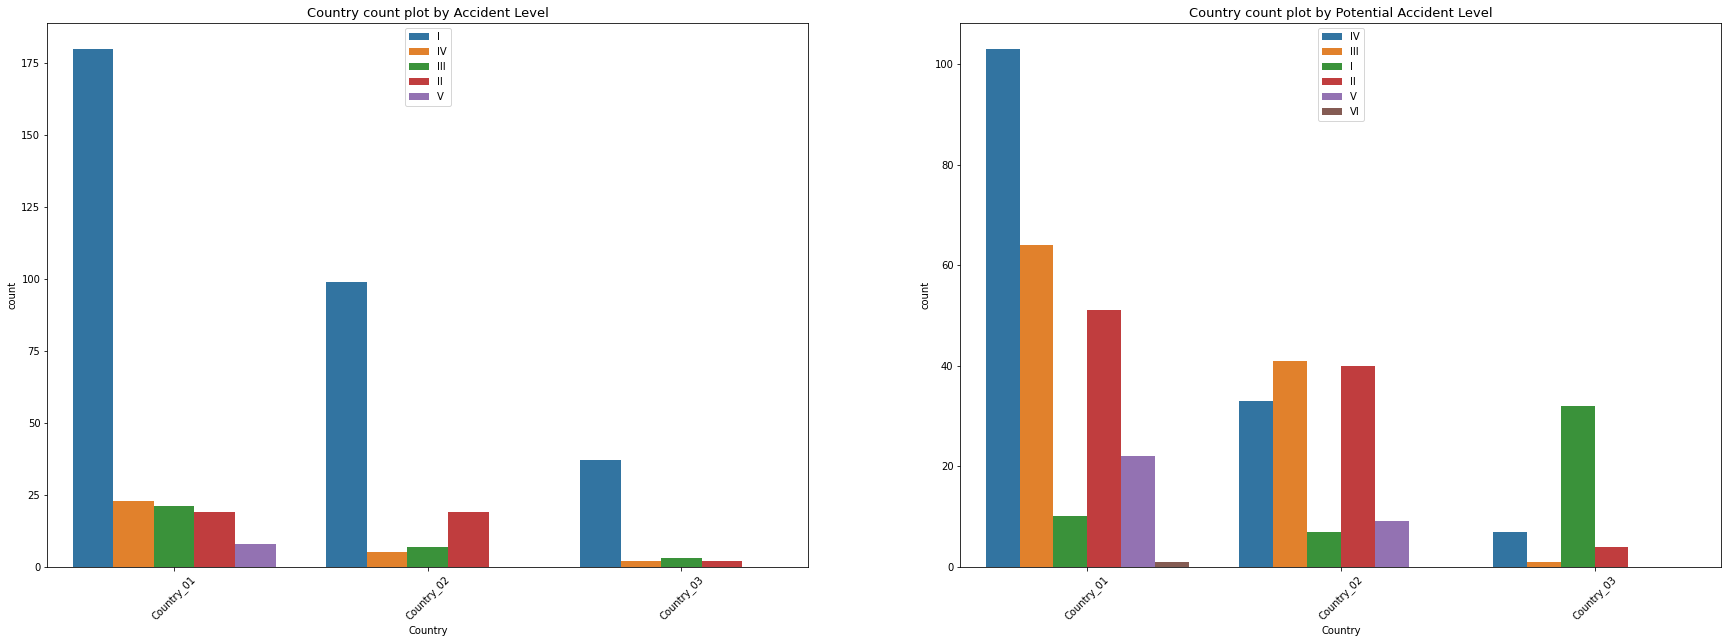

----------------------------------------------------------------------------
ANALYSIS BY Locality Accident Level / Potential Accident Level:


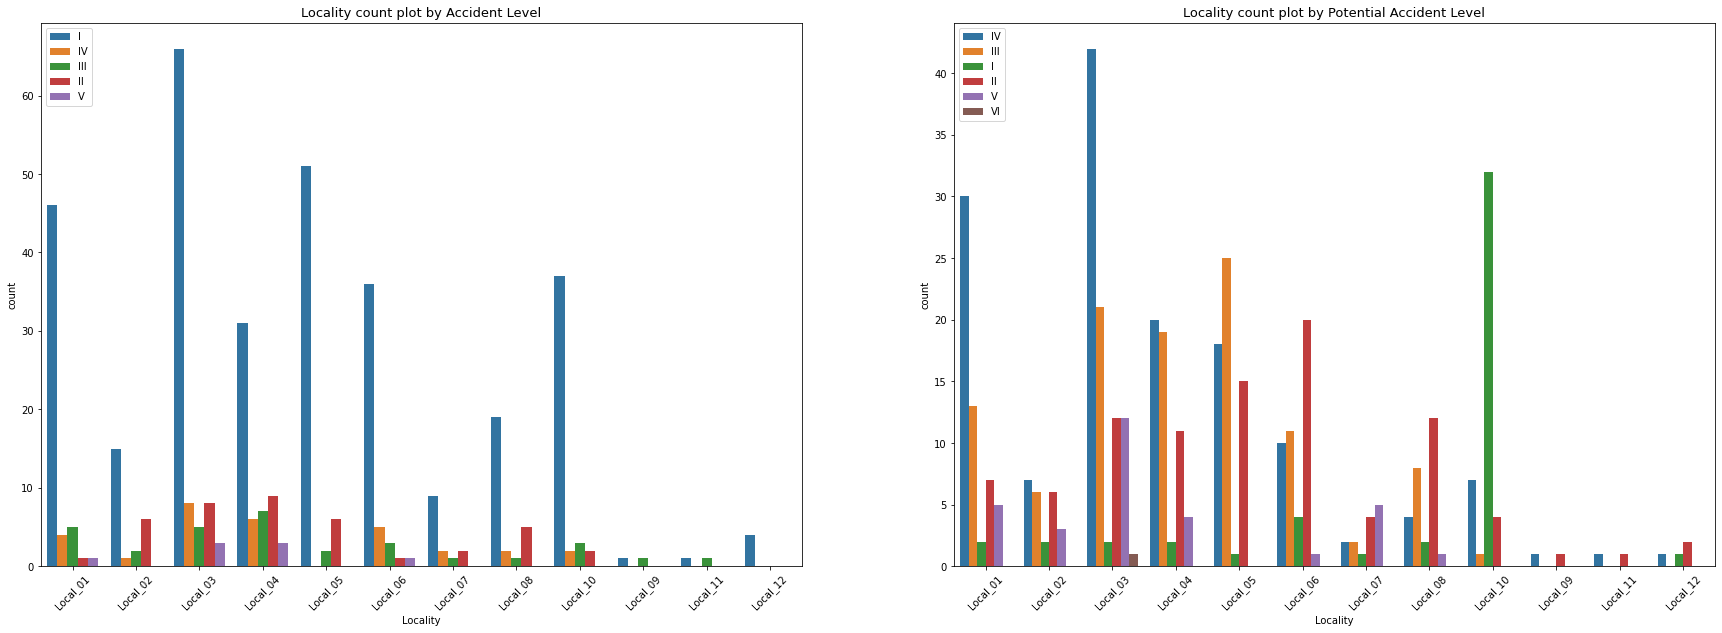

----------------------------------------------------------------------------
ANALYSIS BY Sector Accident Level / Potential Accident Level:


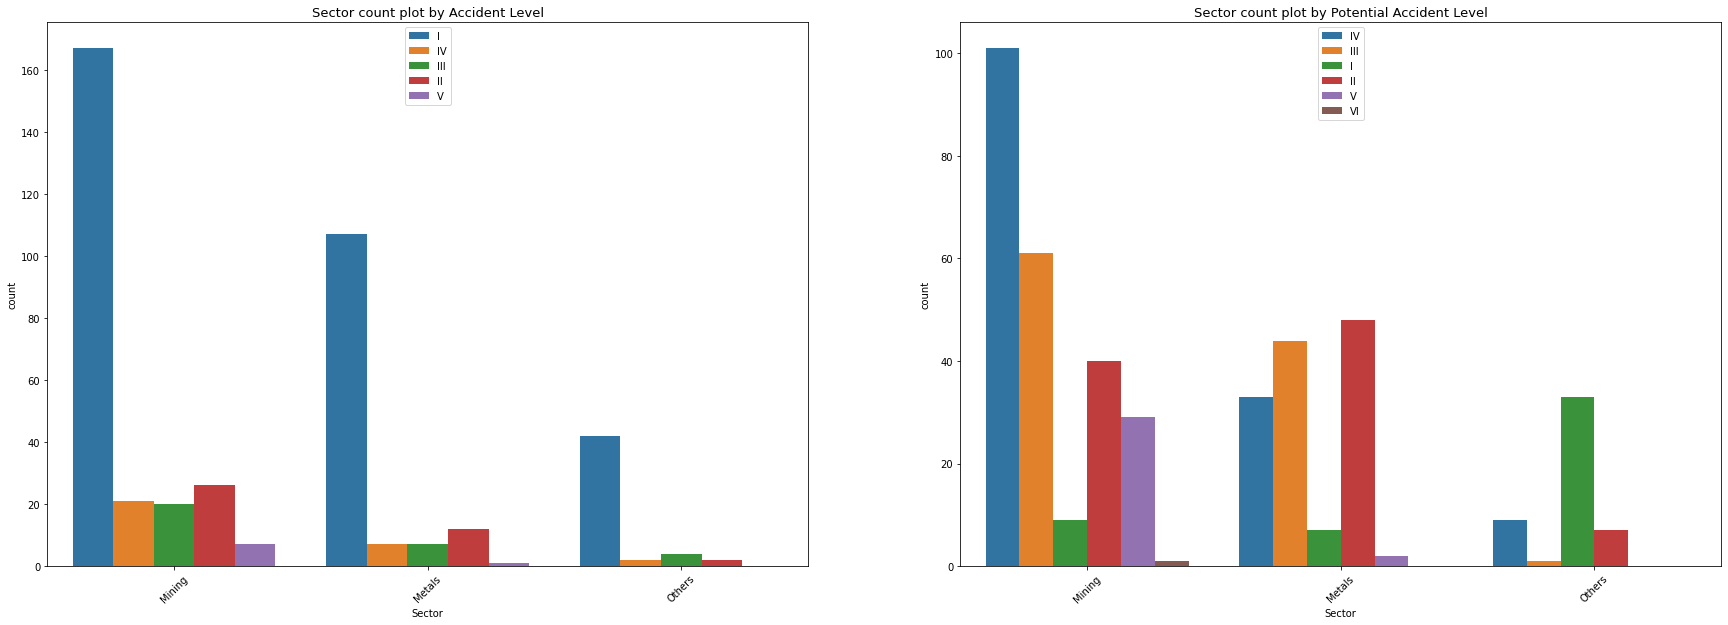

----------------------------------------------------------------------------
ANALYSIS BY Gender Accident Level / Potential Accident Level:


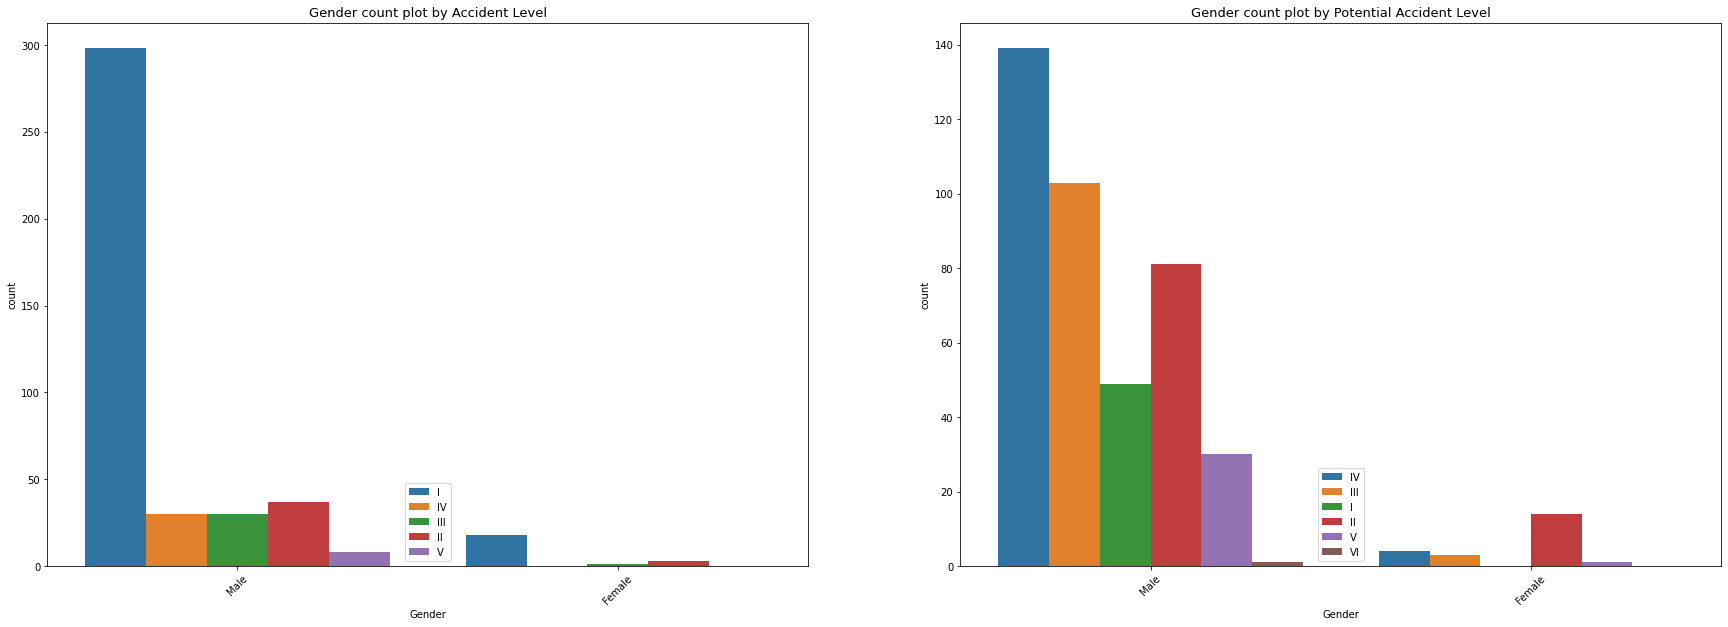

----------------------------------------------------------------------------
ANALYSIS BY Employee type Accident Level / Potential Accident Level:


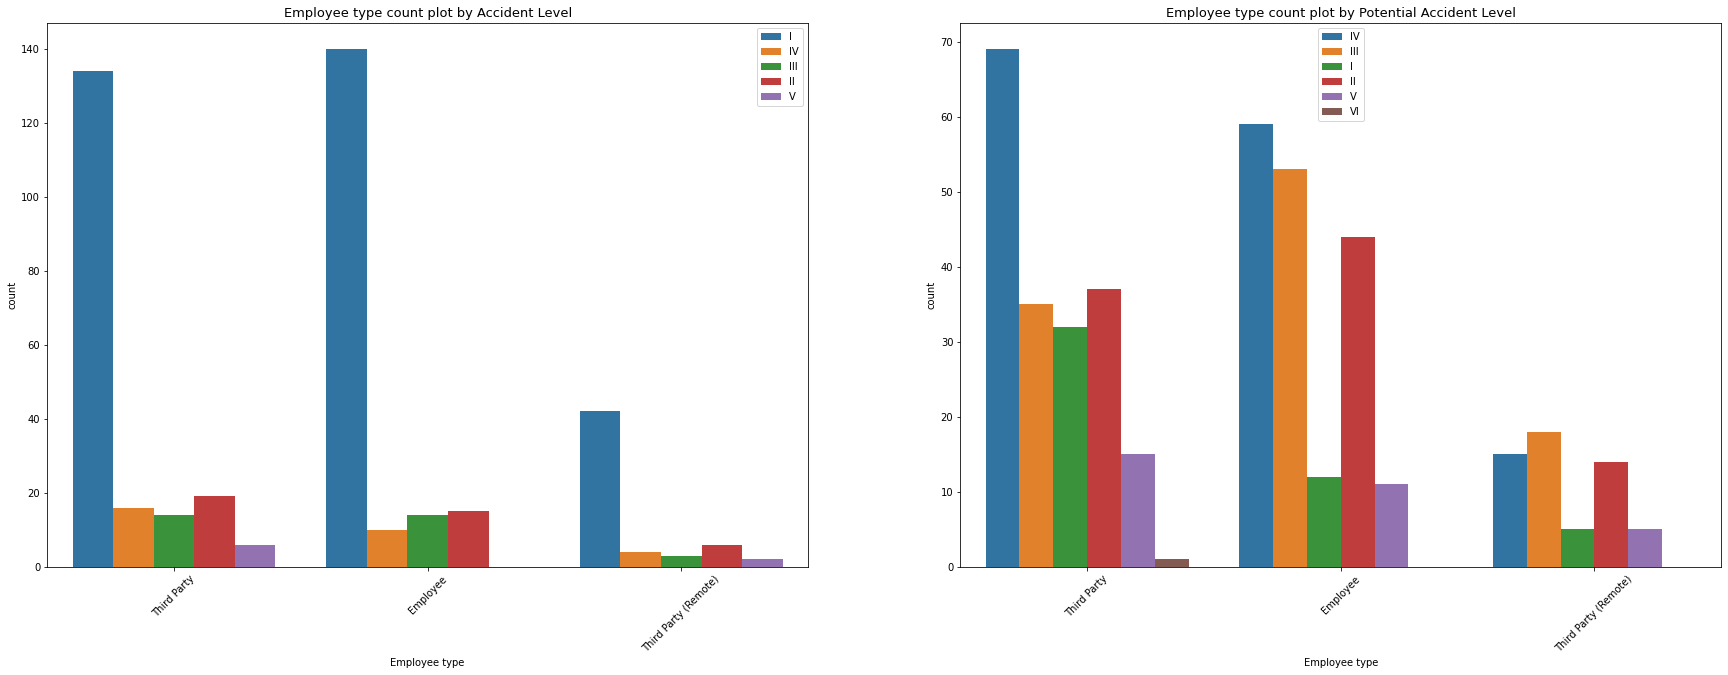

----------------------------------------------------------------------------
ANALYSIS BY Year Accident Level / Potential Accident Level:


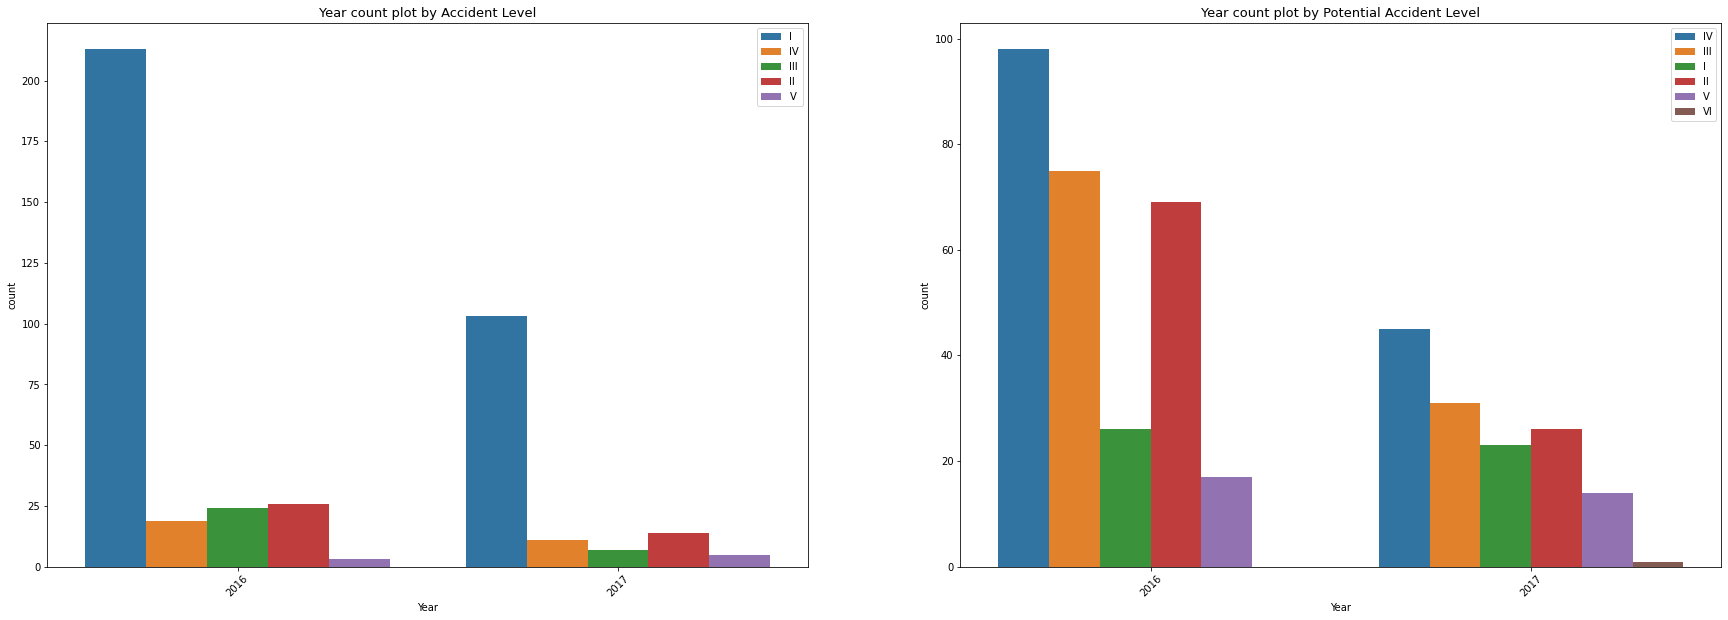

----------------------------------------------------------------------------
ANALYSIS BY Month Accident Level / Potential Accident Level:


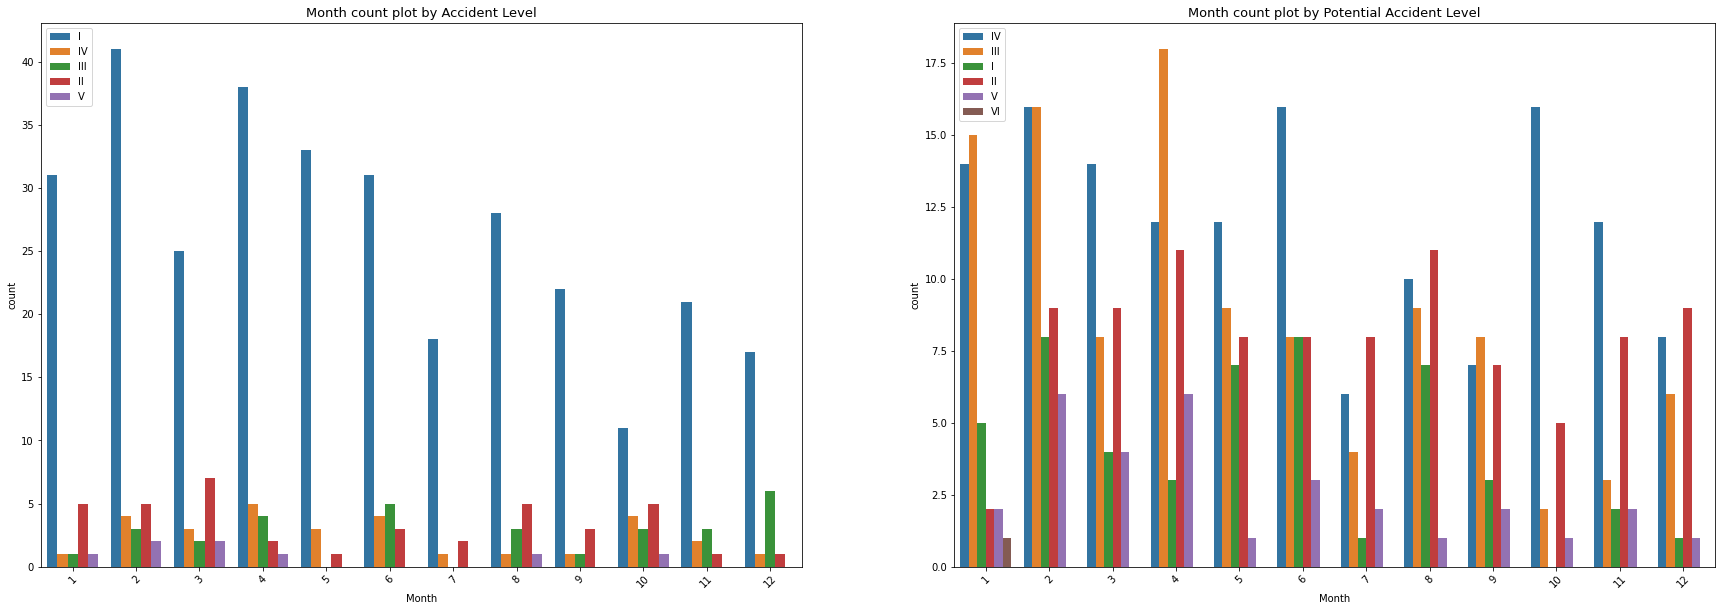

----------------------------------------------------------------------------
ANALYSIS BY Weekday Accident Level / Potential Accident Level:


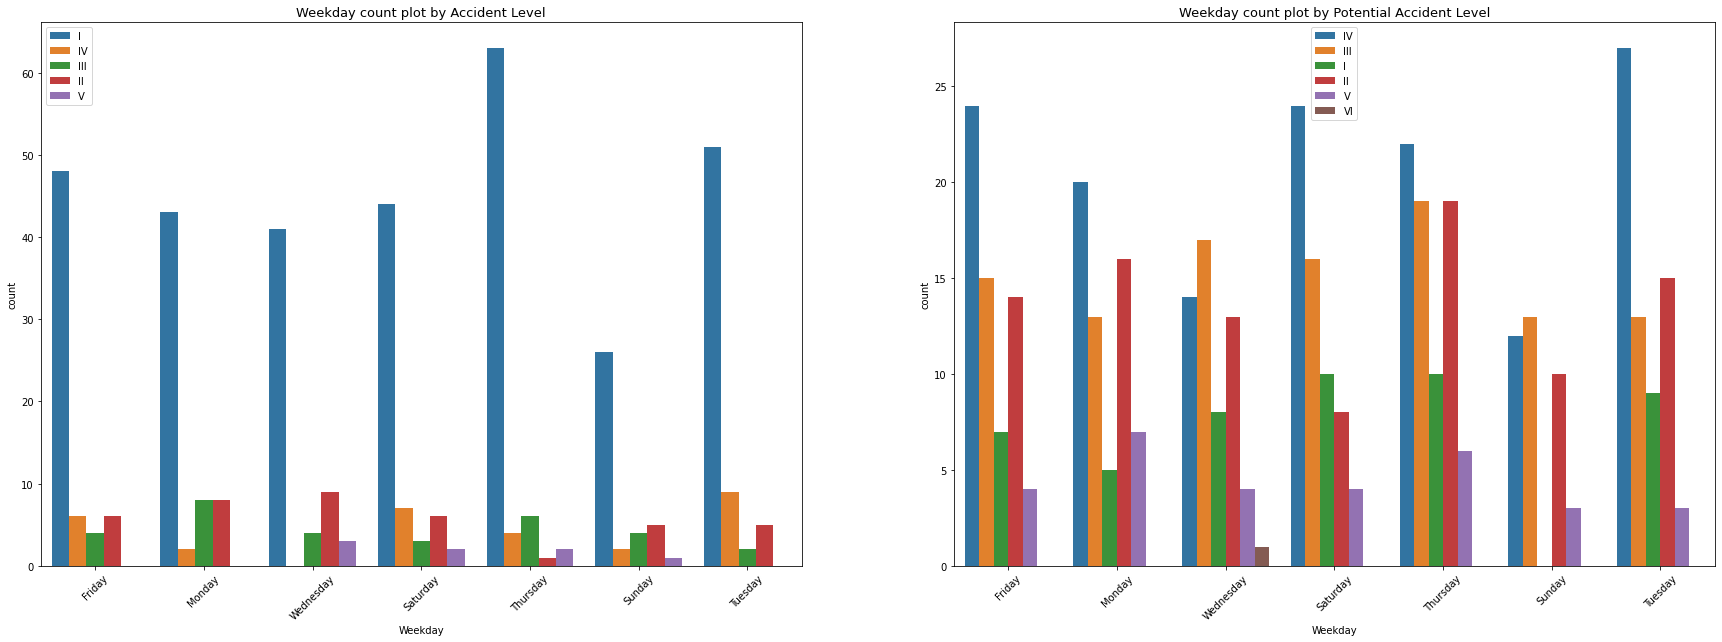

----------------------------------------------------------------------------
ANALYSIS BY Season Accident Level / Potential Accident Level:


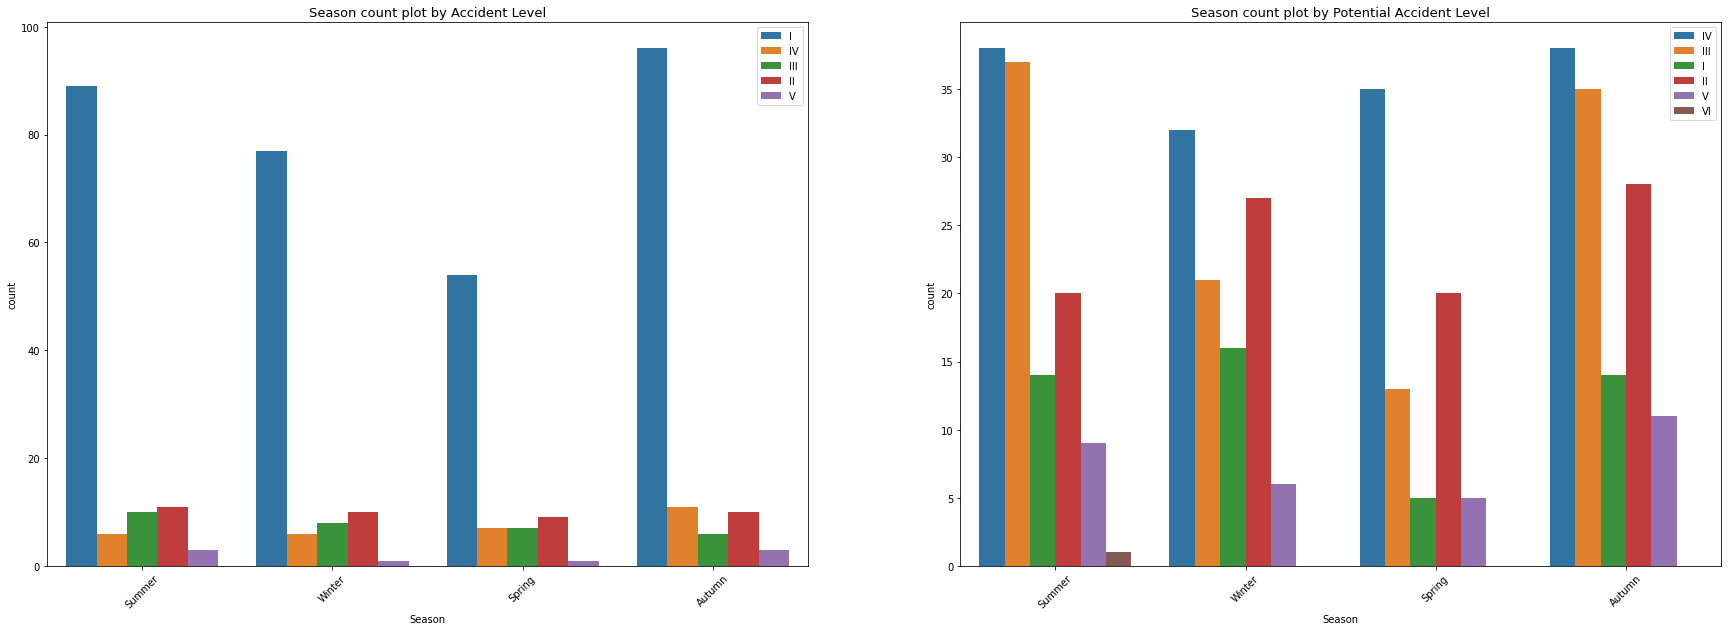

----------------------------------------------------------------------------
ANALYSIS BY Quarter Accident Level / Potential Accident Level:


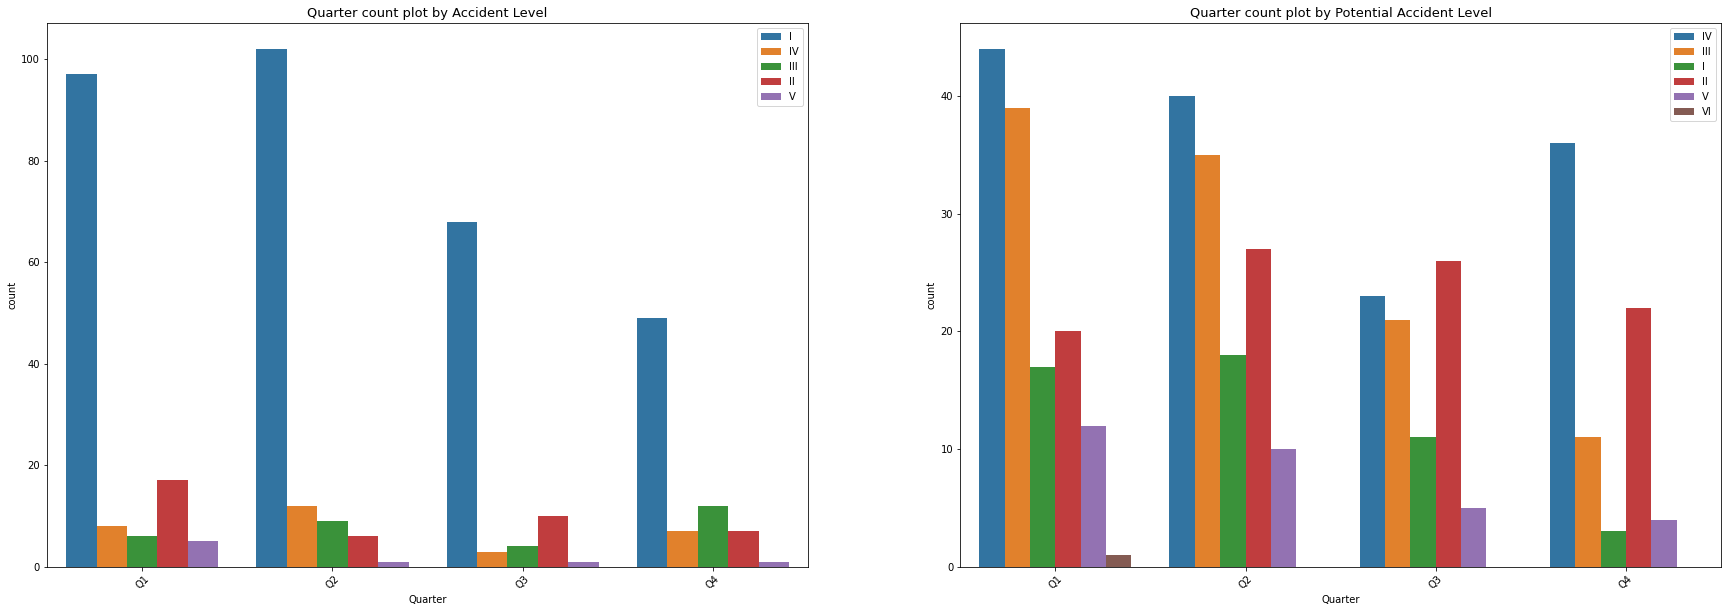

----------------------------------------------------------------------------


In [24]:
for column in ['Country', 'Locality', 'Sector', 'Gender', 'Employee type', 'Year', 'Month', 'Weekday','Season', 'Quarter']:
    print('ANALYSIS BY ' + column + ' Accident Level / Potential Accident Level:')
    BivarPlot(column)
    print('----------------------------------------------------------------------------')

### **Bi-Vairate Analysis Summary**

### **Multivariate Analysis**

In [25]:
def MulvarPlot(aCol):
    fig = plt.figure(figsize = (30, 10))
    ax = fig.add_subplot(121)
    sns.countplot(x = aCol, data = df, ax = ax, orient = 'v',
                  hue = 'Sector').set_title(aCol.capitalize() +' count plot by Sector', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Sector'].unique())
    plt.xticks(rotation = 45)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = aCol, data = df, ax = ax, orient = 'v', 
                  hue = 'Gender').set_title(aCol.capitalize() +' count plot by Gender', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Gender'].unique())
    plt.xticks(rotation = 45)
    return plt.show()

ANALYSIS BY Country on Sector / Gender:


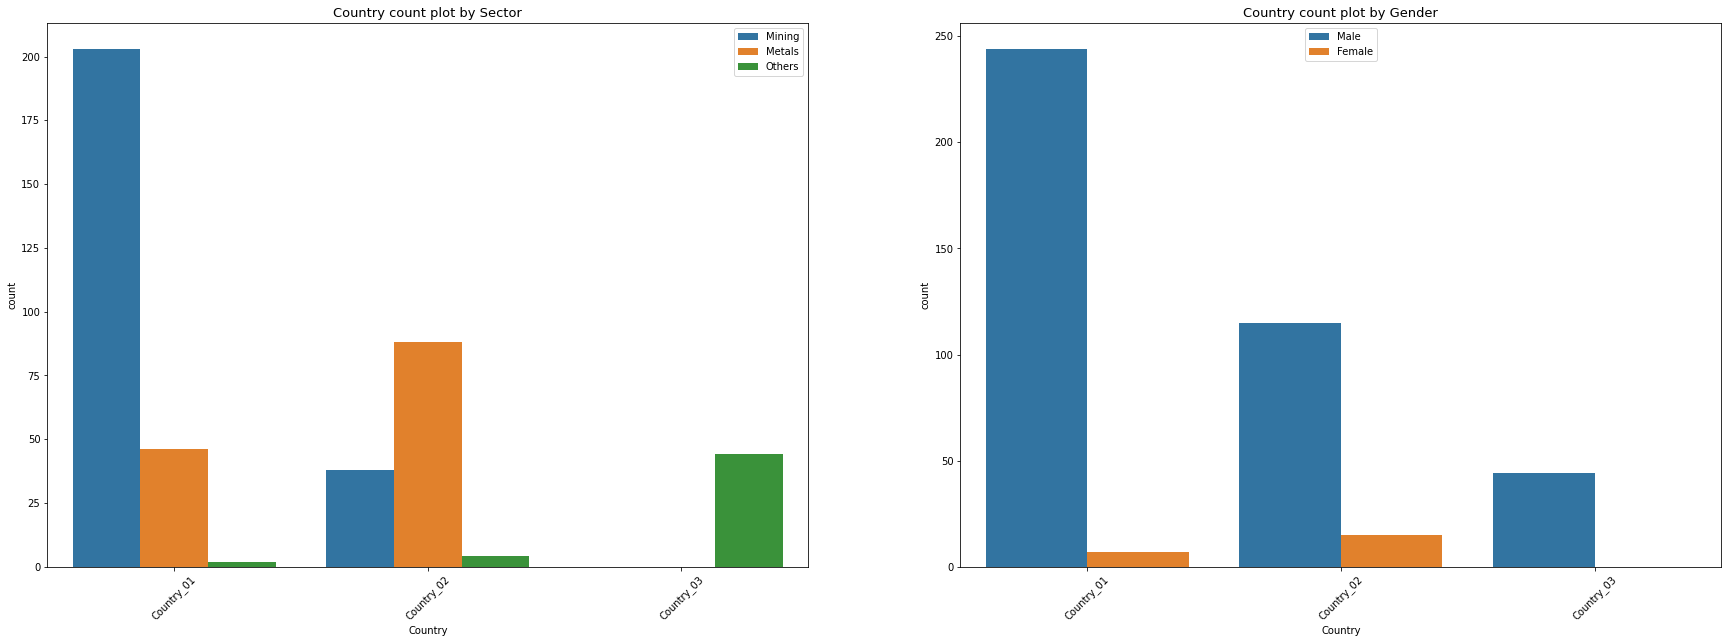

----------------------------------------------------------------------------
ANALYSIS BY Locality on Sector / Gender:


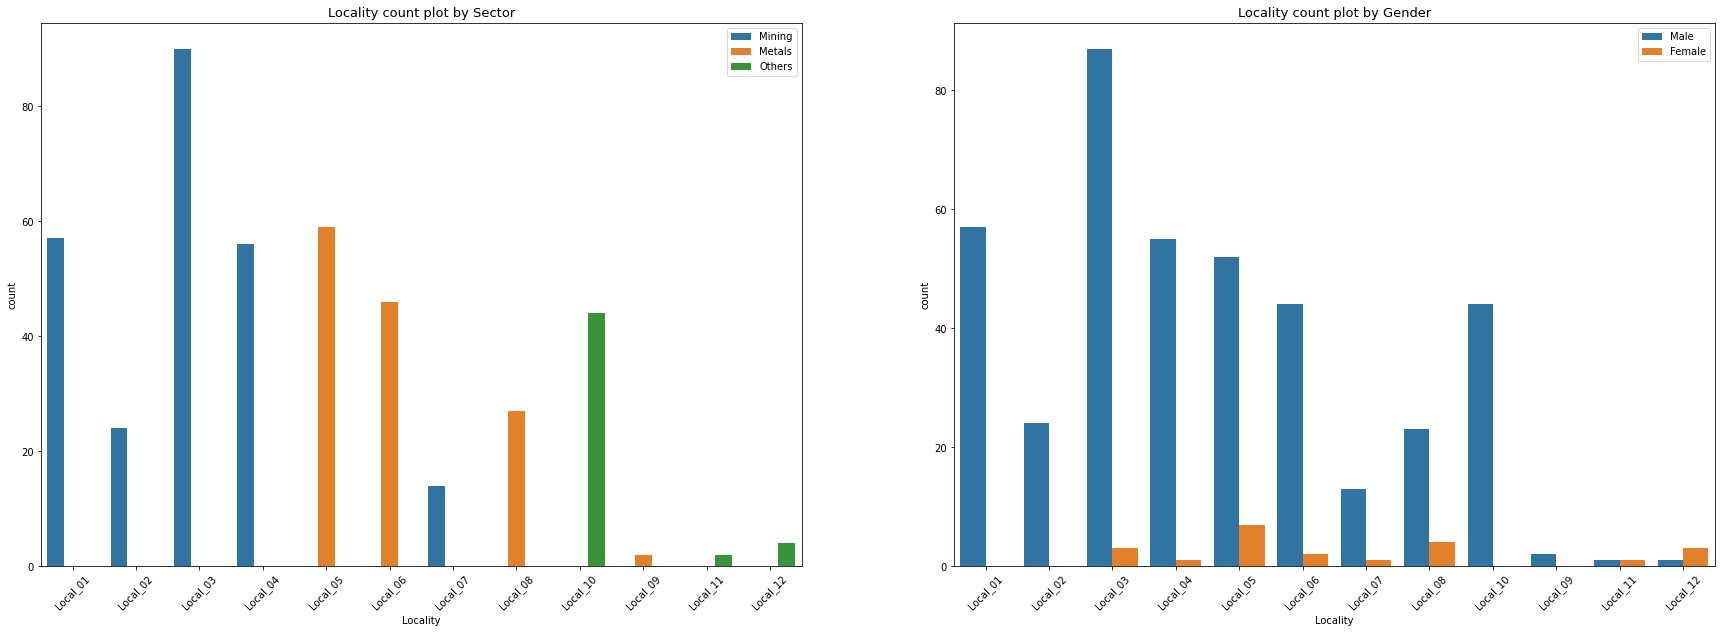

----------------------------------------------------------------------------
ANALYSIS BY Employee type on Sector / Gender:


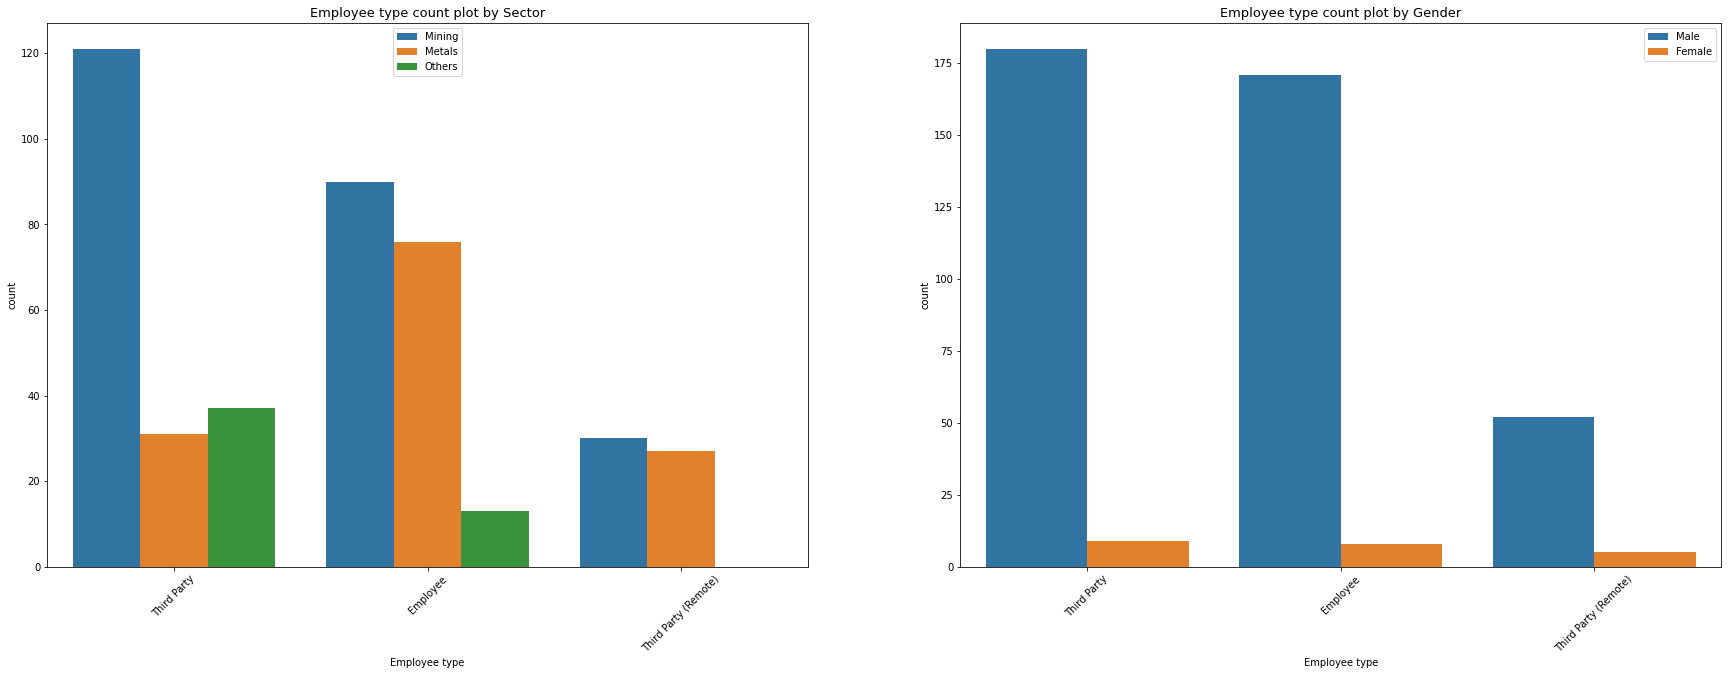

----------------------------------------------------------------------------
ANALYSIS BY Accident Level on Sector / Gender:


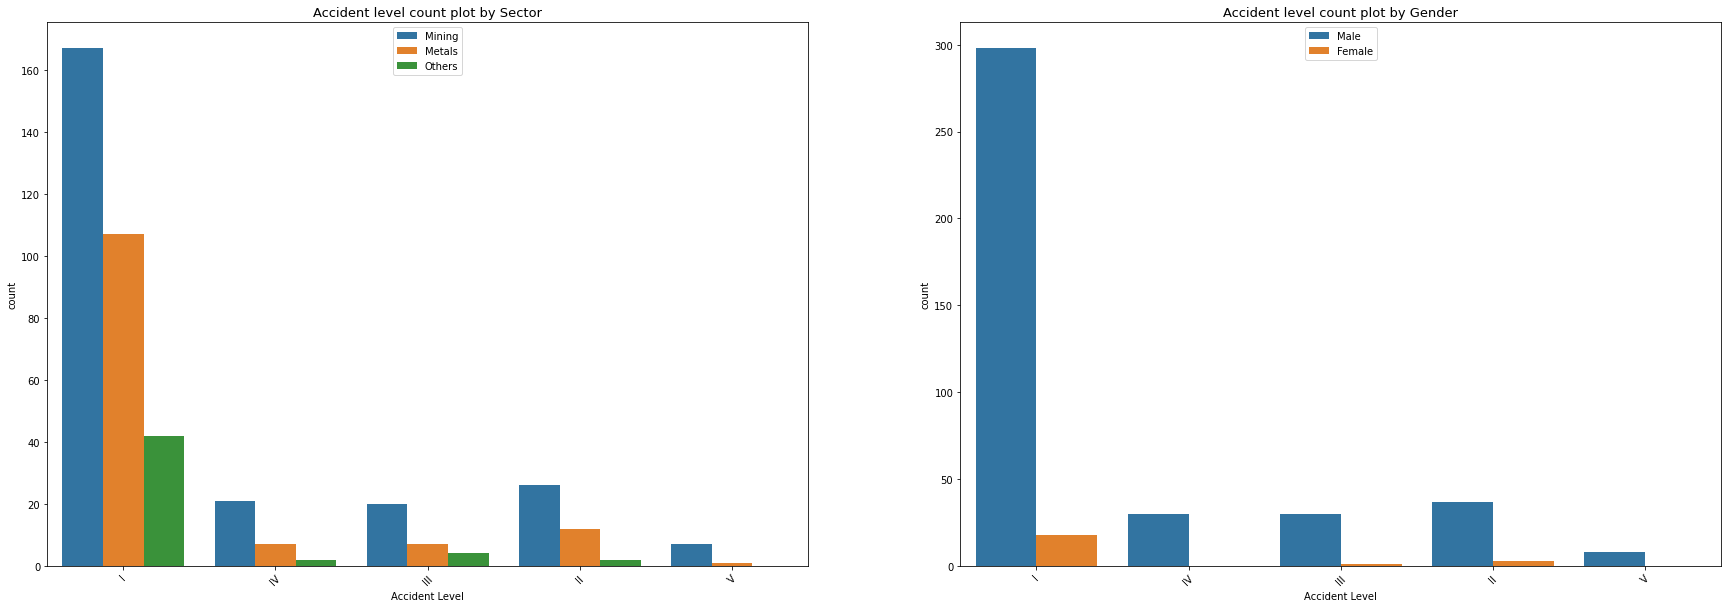

----------------------------------------------------------------------------
ANALYSIS BY Potential Accident Level on Sector / Gender:


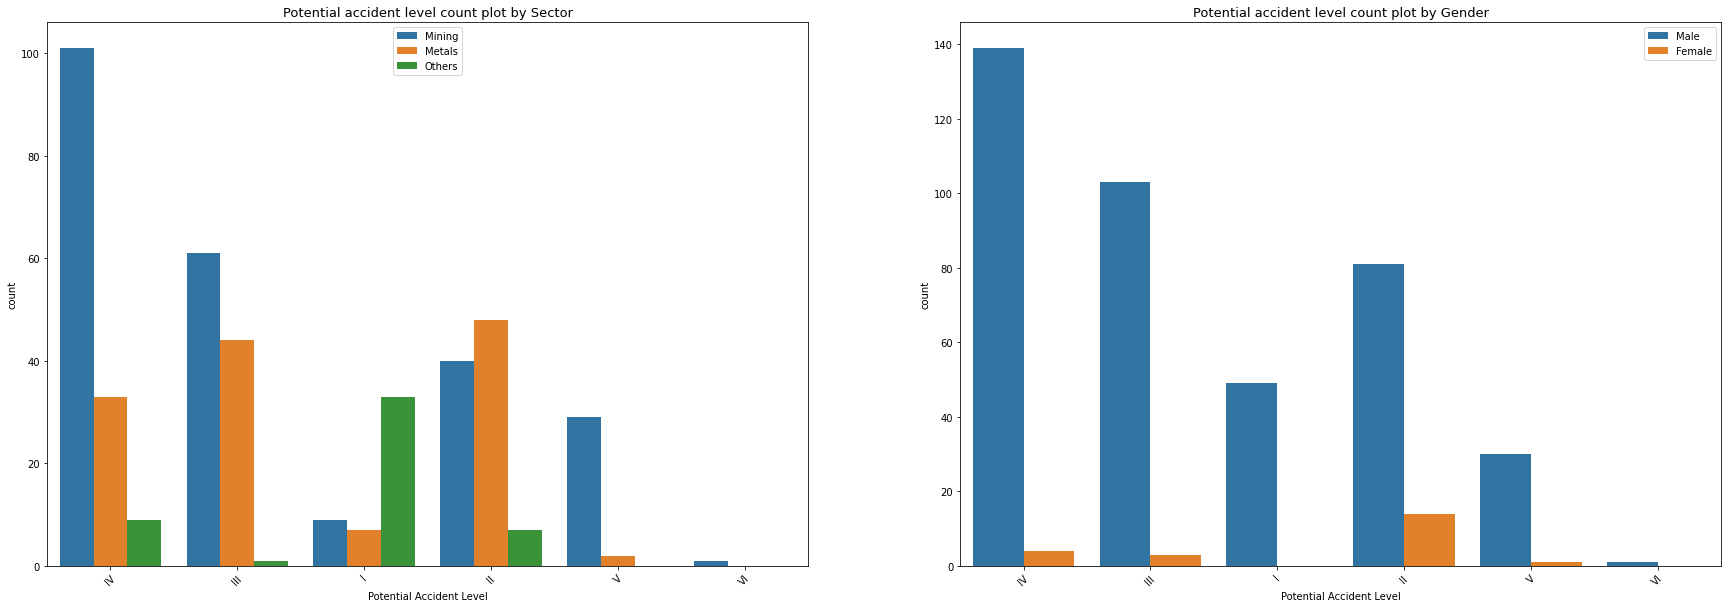

----------------------------------------------------------------------------
ANALYSIS BY Year on Sector / Gender:


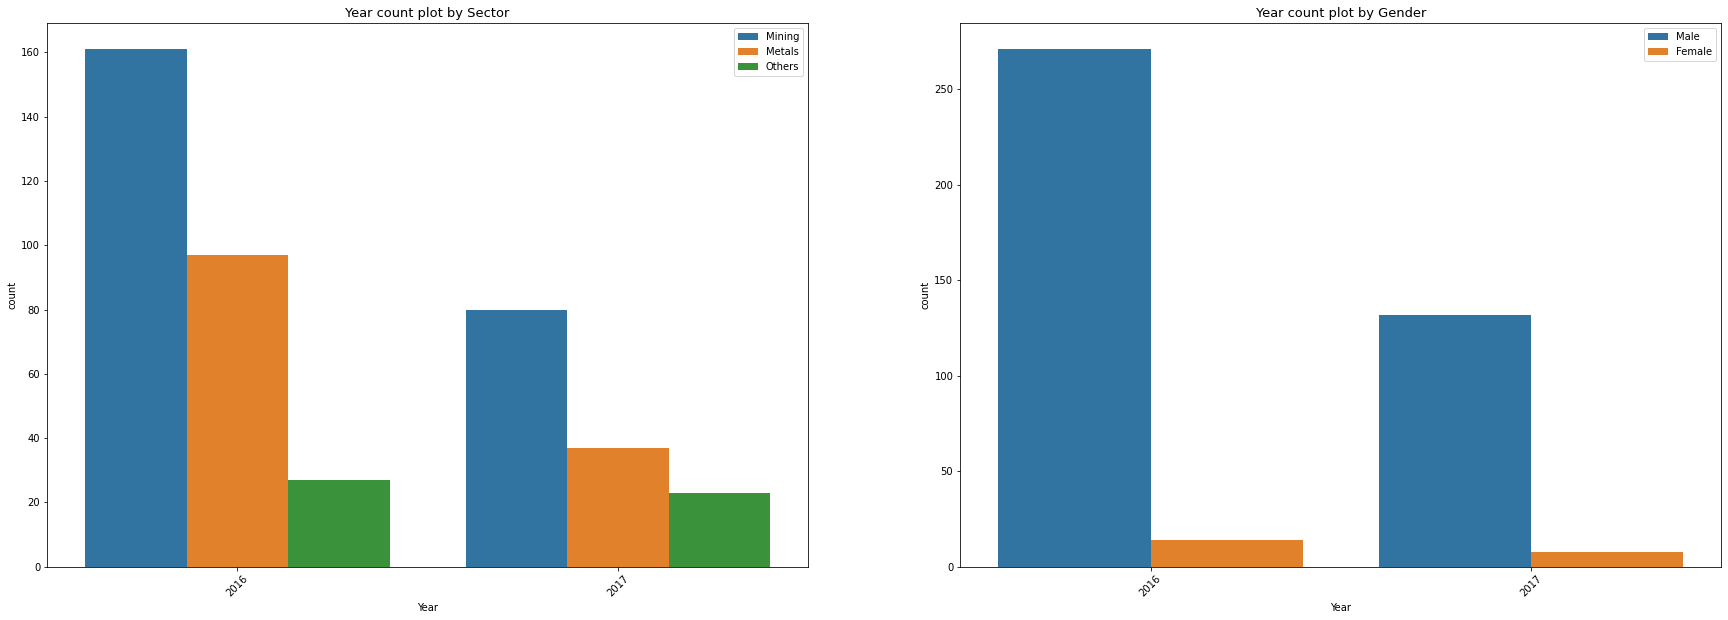

----------------------------------------------------------------------------
ANALYSIS BY Month on Sector / Gender:


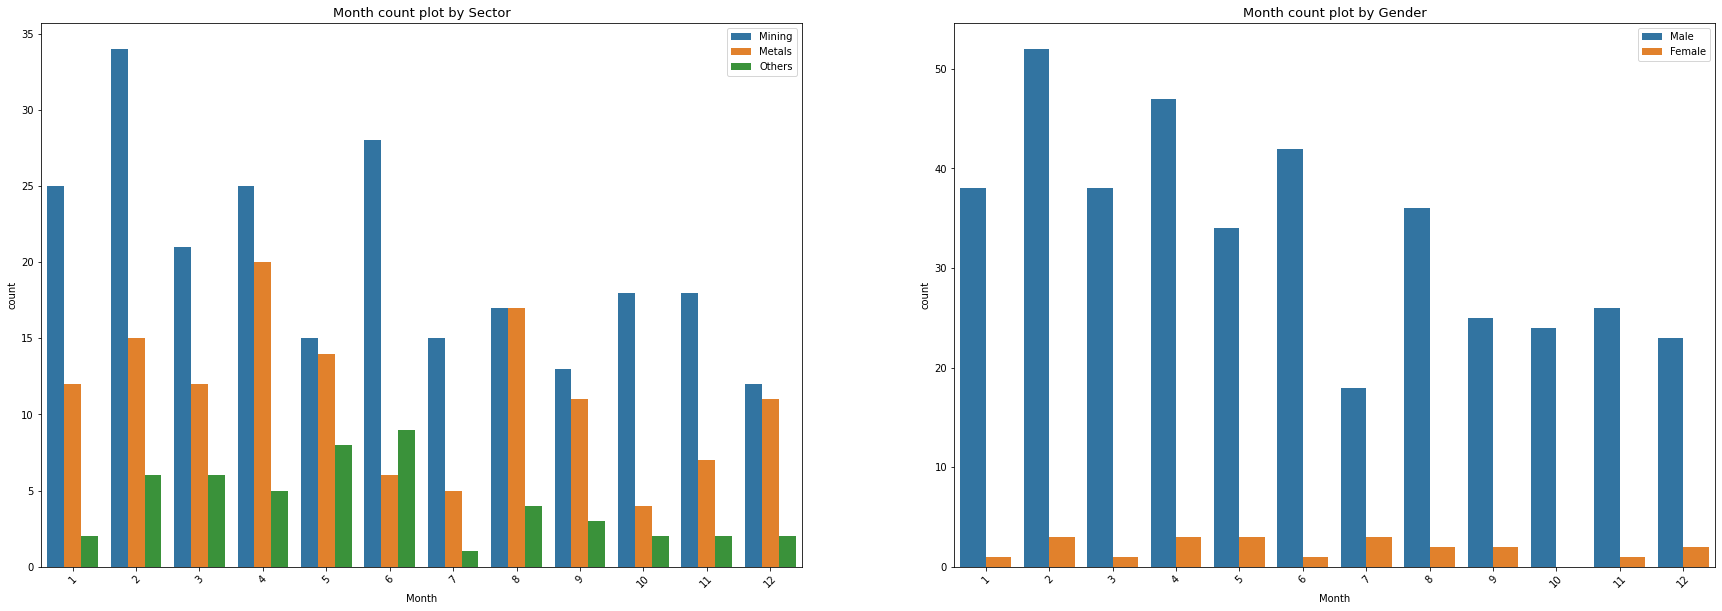

----------------------------------------------------------------------------
ANALYSIS BY Day on Sector / Gender:


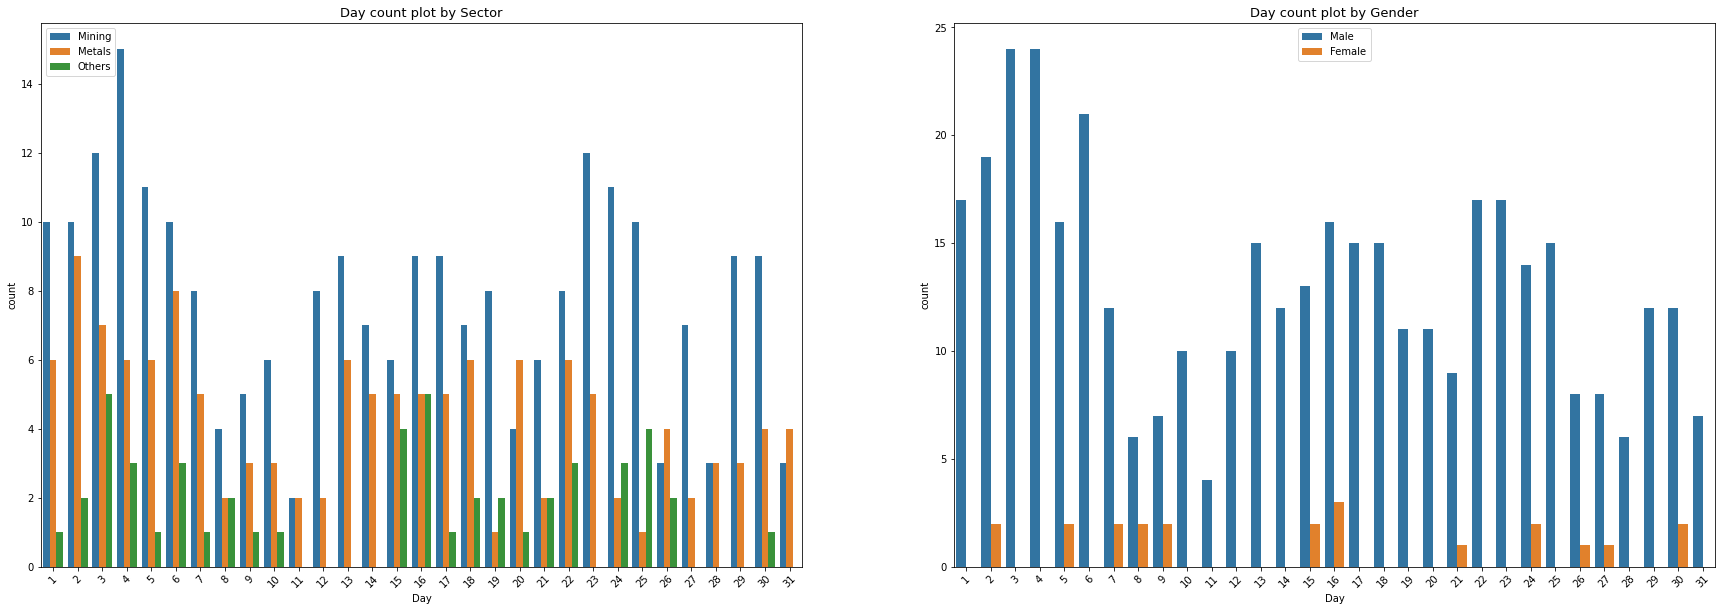

----------------------------------------------------------------------------
ANALYSIS BY Weekday on Sector / Gender:


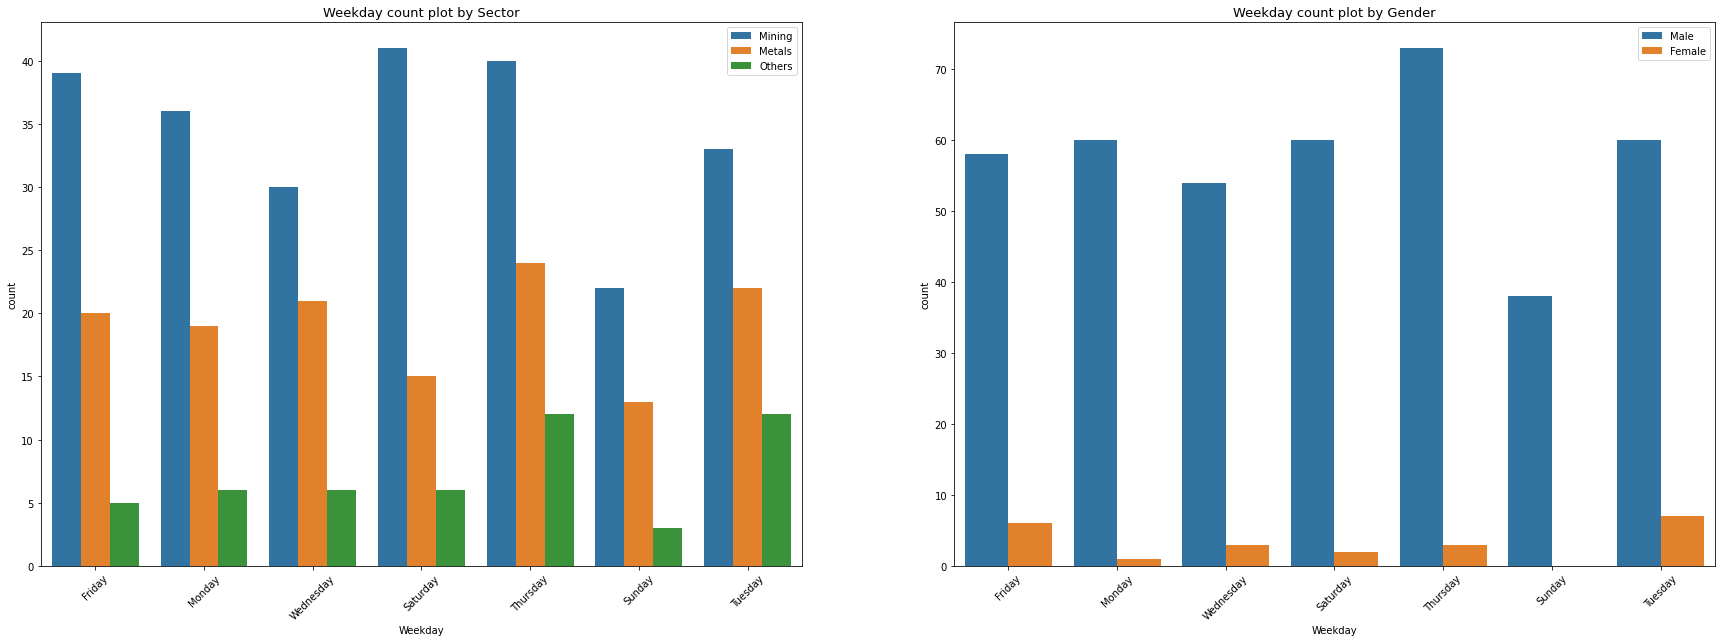

----------------------------------------------------------------------------
ANALYSIS BY Season on Sector / Gender:


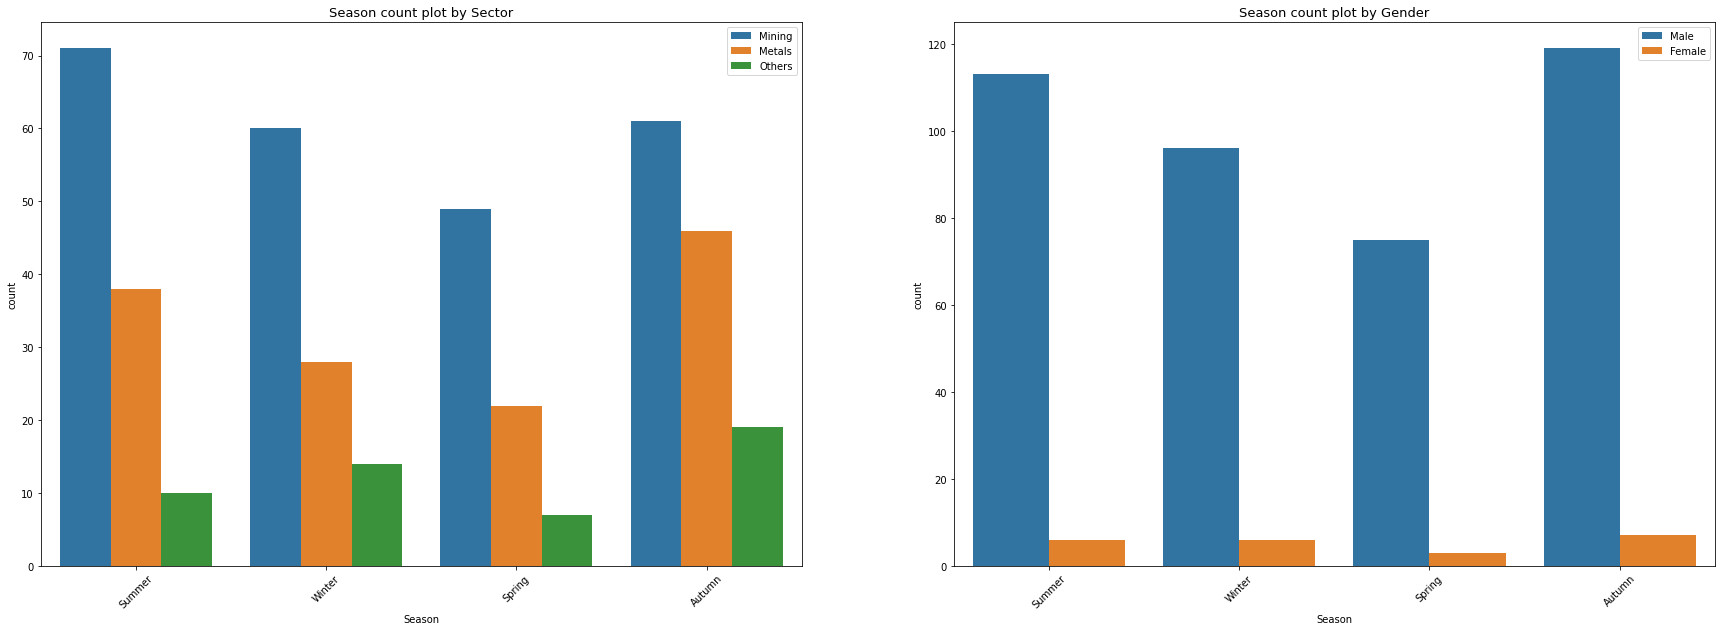

----------------------------------------------------------------------------
ANALYSIS BY Quarter on Sector / Gender:


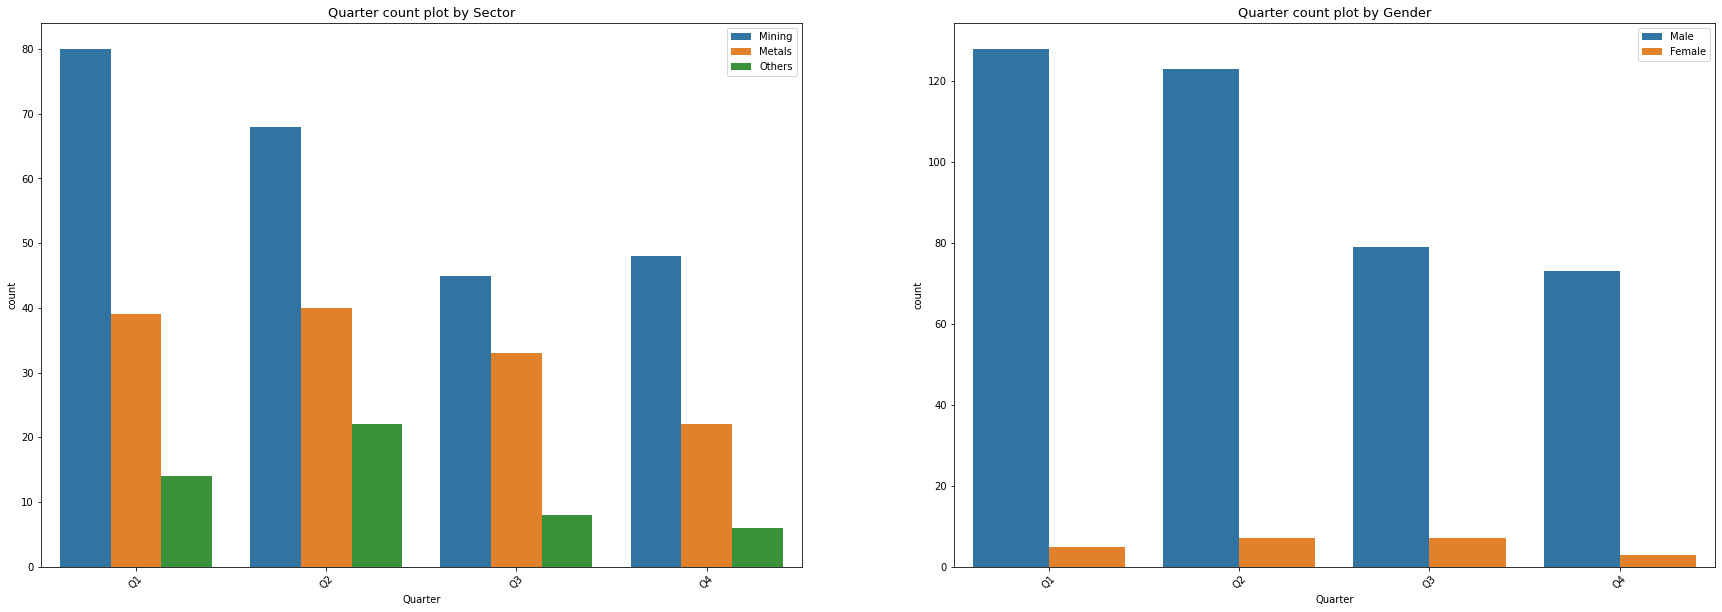

----------------------------------------------------------------------------


In [26]:
for column in ['Country', 'Locality', 'Employee type', 'Accident Level', 'Potential Accident Level','Year', 'Month', 'Day', 'Weekday', 'Season', 'Quarter']:
    print('ANALYSIS BY ' + column + ' on Sector / Gender:')
    MulvarPlot(column)
    print('----------------------------------------------------------------------------')

### **Multivariate Analysis Summary**

## **Label Encoding & Onehot Encoding**

In [27]:
df_le=df

In [28]:
label_encoder = LabelEncoder()
for column in ['Country', 'Locality', 'Sector', 'Accident Level','Potential Accident Level', 'Gender', 'Employee type', 'Risk Type','Year', 'Month', 'Day', 'Weekday', 'WeekofYear','Season', 'Quarter']:
  df_le[column]= label_encoder.fit_transform(df_le[column]) 

df_le.head()


,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear,Season,Quarter
0,2016-01-01,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...,0,0,0,0,52,2,0
1,2016-02-01,1,1,1,0,3,1,0,21,During the activation of a sodium sulphide pum...,0,1,0,1,4,2,0
2,2016-06-01,0,2,1,0,2,1,2,15,In the sub-station MILPO located at level +170...,0,5,0,6,21,3,1
3,2016-08-01,0,3,1,0,0,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...,0,7,0,1,30,3,2
4,2016-10-01,0,3,1,3,3,1,1,16,Approximately at 11:45 a.m. in circumstances t...,0,9,0,2,38,1,3


## **Pair Plotting**

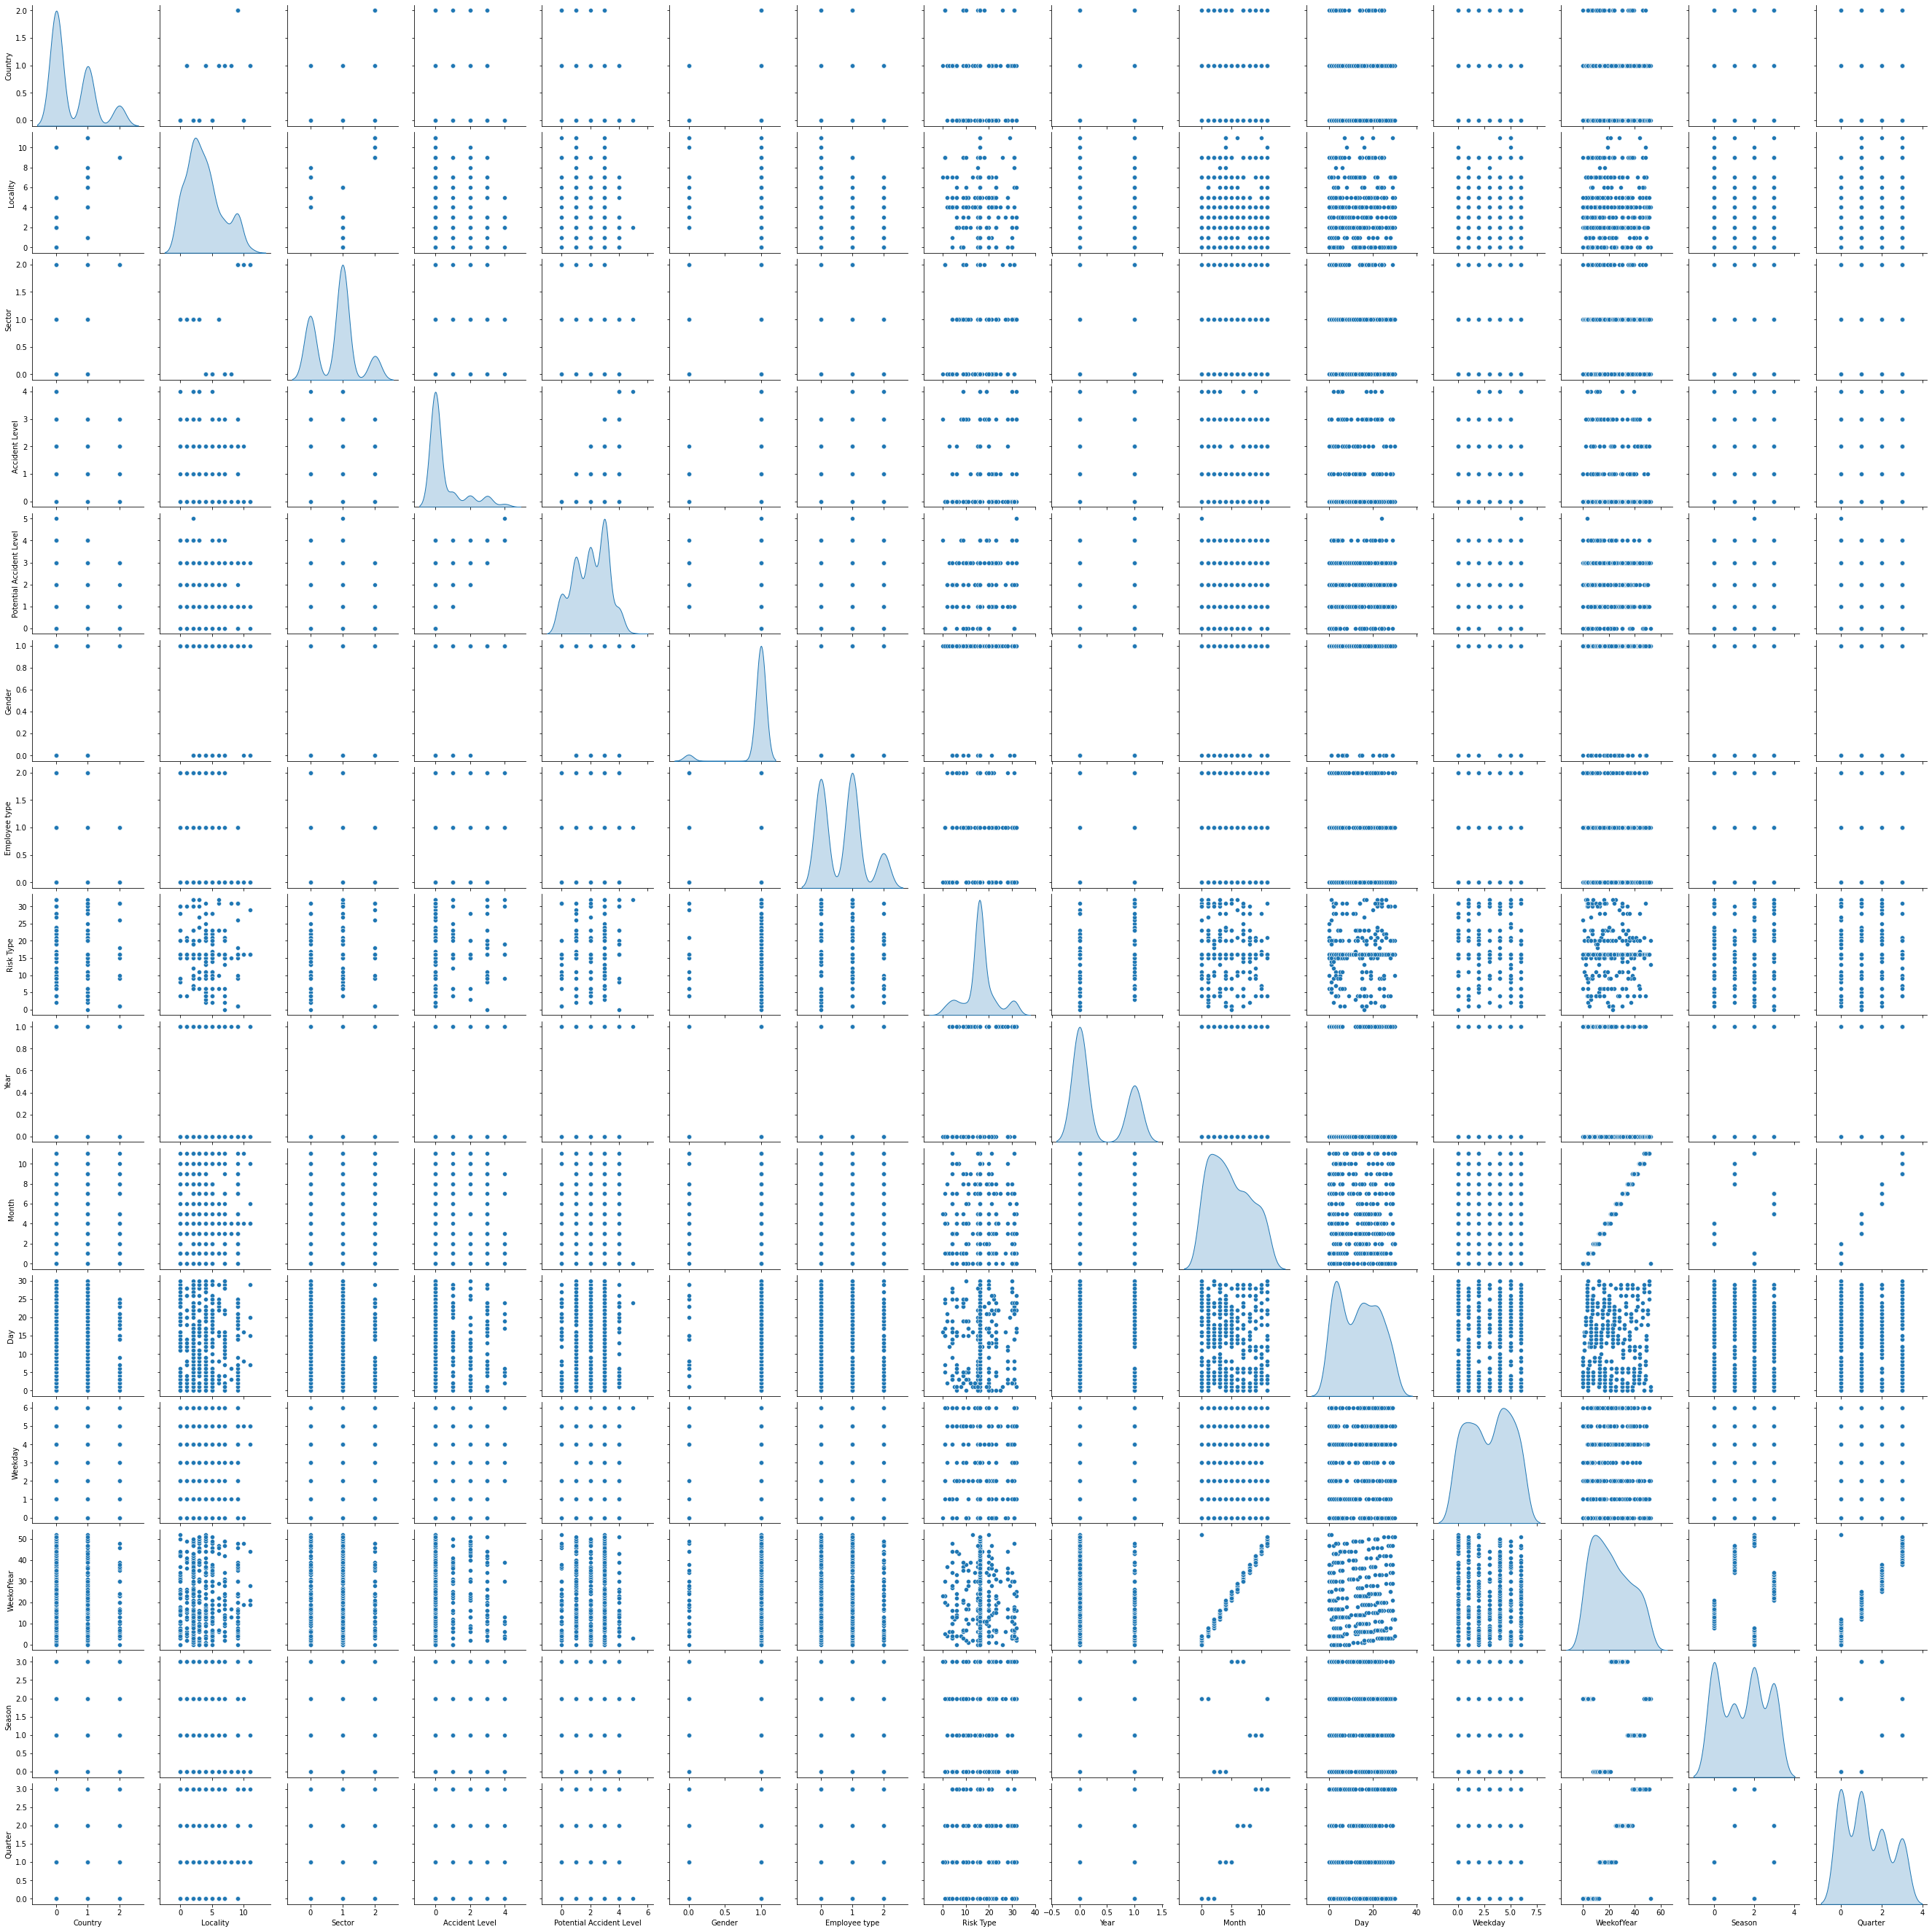

In [29]:
df_le1 = df_le.drop(columns = ['Date', 'Description'])

sns.pairplot(df_le1, diag_kind='kde');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


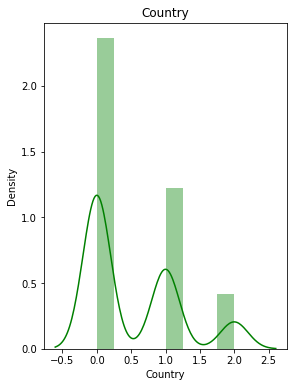

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


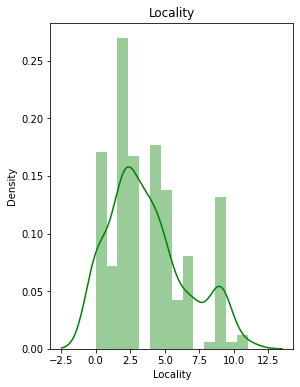

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


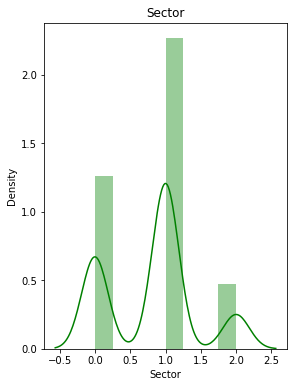

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


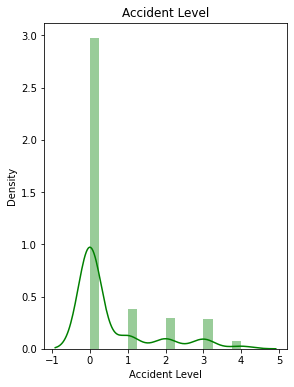

In [30]:
def distp(aCol):
  sns.distplot(df[aCol],color='green')
  plt.show()


for column in ['Country', 'Locality', 'Sector', 'Accident Level']:
  i=1
  plt.figure(figsize=(20,6))
  plt.subplot(1, 4, i)
  plt.title(column)
  distp(column)
  i=i+1


  


## **NLP Preprocessing**

### **Removing all irrelevant Characters**

In [48]:
def rem_nonAlphaNumeric(Description):
  return re.sub('[^a-zA-Z0-9]',' ',Description)

df_le['CleanDescription'] = df_le['Description'].apply(rem_nonAlphaNumeric)
df_le.head()

,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear,Season,Quarter,CleanDescription
0,2016-01-01,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...,0,0,0,0,52,2,0,While removing the drill rod of the Jumbo 08 f...
1,2016-02-01,1,1,1,0,3,1,0,21,During the activation of a sodium sulphide pum...,0,1,0,1,4,2,0,During the activation of a sodium sulphide pum...
2,2016-06-01,0,2,1,0,2,1,2,15,In the sub-station MILPO located at level +170...,0,5,0,6,21,3,1,In the sub station MILPO located at level 170...
3,2016-08-01,0,3,1,0,0,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...,0,7,0,1,30,3,2,Being 9 45 am approximately in the Nv 1880 C...
4,2016-10-01,0,3,1,3,3,1,1,16,Approximately at 11:45 a.m. in circumstances t...,0,9,0,2,38,1,3,Approximately at 11 45 a m in circumstances t...


### **Remove Numerical values**

In [49]:
def rem_Numeric(Description):
  return re.sub('[^a-zA-Z]',' ',Description)

df_le['CleanDescription'] = df_le['CleanDescription'].apply(rem_Numeric)
df_le.head()

,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear,Season,Quarter,CleanDescription
0,2016-01-01,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...,0,0,0,0,52,2,0,While removing the drill rod of the Jumbo f...
1,2016-02-01,1,1,1,0,3,1,0,21,During the activation of a sodium sulphide pum...,0,1,0,1,4,2,0,During the activation of a sodium sulphide pum...
2,2016-06-01,0,2,1,0,2,1,2,15,In the sub-station MILPO located at level +170...,0,5,0,6,21,3,1,In the sub station MILPO located at level ...
3,2016-08-01,0,3,1,0,0,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...,0,7,0,1,30,3,2,Being am approximately in the Nv C...
4,2016-10-01,0,3,1,3,3,1,1,16,Approximately at 11:45 a.m. in circumstances t...,0,9,0,2,38,1,3,Approximately at a m in circumstances t...


### **Change all Characters to lowercase**

In [50]:
def to_lcase(Description):
  return str(Description).lower()

df_le['CleanDescription'] = df_le['CleanDescription'].apply(to_lcase)
df_le.head()

,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear,Season,Quarter,CleanDescription
0,2016-01-01,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...,0,0,0,0,52,2,0,while removing the drill rod of the jumbo f...
1,2016-02-01,1,1,1,0,3,1,0,21,During the activation of a sodium sulphide pum...,0,1,0,1,4,2,0,during the activation of a sodium sulphide pum...
2,2016-06-01,0,2,1,0,2,1,2,15,In the sub-station MILPO located at level +170...,0,5,0,6,21,3,1,in the sub station milpo located at level ...
3,2016-08-01,0,3,1,0,0,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...,0,7,0,1,30,3,2,being am approximately in the nv c...
4,2016-10-01,0,3,1,3,3,1,1,16,Approximately at 11:45 a.m. in circumstances t...,0,9,0,2,38,1,3,approximately at a m in circumstances t...


### **Word Tokenizing**

In [52]:
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

def to_wordtokenize(Description):
  return word_tokenize(Description)

df_le['CleanDescription'] = df_le['CleanDescription'].apply(to_wordtokenize)
df_le.head()

,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear,Season,Quarter,CleanDescription
0,2016-01-01,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...,0,0,0,0,52,2,0,"[while, removing, the, drill, rod, of, the, ju..."
1,2016-02-01,1,1,1,0,3,1,0,21,During the activation of a sodium sulphide pum...,0,1,0,1,4,2,0,"[during, the, activation, of, a, sodium, sulph..."
2,2016-06-01,0,2,1,0,2,1,2,15,In the sub-station MILPO located at level +170...,0,5,0,6,21,3,1,"[in, the, sub, station, milpo, located, at, le..."
3,2016-08-01,0,3,1,0,0,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...,0,7,0,1,30,3,2,"[being, am, approximately, in, the, nv, cx, ob..."
4,2016-10-01,0,3,1,3,3,1,1,16,Approximately at 11:45 a.m. in circumstances t...,0,9,0,2,38,1,3,"[approximately, at, a, m, in, circumstances, t..."


### **Remove Stopwords**

In [53]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):  
  return [item for item in text if item not in stop_words]

df_le['CleanDescription'] = df_le['CleanDescription'].apply(remove_stopwords)
df_le.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear,Season,Quarter,CleanDescription
0,2016-01-01,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...,0,0,0,0,52,2,0,"[removing, drill, rod, jumbo, maintenance, sup..."
1,2016-02-01,1,1,1,0,3,1,0,21,During the activation of a sodium sulphide pum...,0,1,0,1,4,2,0,"[activation, sodium, sulphide, pump, piping, u..."
2,2016-06-01,0,2,1,0,2,1,2,15,In the sub-station MILPO located at level +170...,0,5,0,6,21,3,1,"[sub, station, milpo, located, level, collabor..."
3,2016-08-01,0,3,1,0,0,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...,0,7,0,1,30,3,2,"[approximately, nv, cx, ob, personnel, begins,..."
4,2016-10-01,0,3,1,3,3,1,1,16,Approximately at 11:45 a.m. in circumstances t...,0,9,0,2,38,1,3,"[approximately, circumstances, mechanics, anth..."


### **Lemmentizing**

In [54]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
nltk.download('wordnet')

Word_lemmat = WordNetLemmatizer()
def lemmentize(text):  
  return [Word_lemmat.lemmatize(word=w, pos='v') for w in text]

df_le['CleanDescription'] = df_le['CleanDescription'].apply(lemmentize)
df_le.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear,Season,Quarter,CleanDescription
0,2016-01-01,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...,0,0,0,0,52,2,0,"[remove, drill, rod, jumbo, maintenance, super..."
1,2016-02-01,1,1,1,0,3,1,0,21,During the activation of a sodium sulphide pum...,0,1,0,1,4,2,0,"[activation, sodium, sulphide, pump, pip, unco..."
2,2016-06-01,0,2,1,0,2,1,2,15,In the sub-station MILPO located at level +170...,0,5,0,6,21,3,1,"[sub, station, milpo, locate, level, collabora..."
3,2016-08-01,0,3,1,0,0,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...,0,7,0,1,30,3,2,"[approximately, nv, cx, ob, personnel, begin, ..."
4,2016-10-01,0,3,1,3,3,1,1,16,Approximately at 11:45 a.m. in circumstances t...,0,9,0,2,38,1,3,"[approximately, circumstances, mechanics, anth..."


### **Remove the words having length less than and equal to 2**

In [55]:
def rem_2lenword(text):
  return [i for i in text if len(i)>2]

df_le['CleanDescription'] = df_le['CleanDescription'].apply(rem_2lenword)
df_le.head()

,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear,Season,Quarter,CleanDescription
0,2016-01-01,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...,0,0,0,0,52,2,0,"[remove, drill, rod, jumbo, maintenance, super..."
1,2016-02-01,1,1,1,0,3,1,0,21,During the activation of a sodium sulphide pum...,0,1,0,1,4,2,0,"[activation, sodium, sulphide, pump, pip, unco..."
2,2016-06-01,0,2,1,0,2,1,2,15,In the sub-station MILPO located at level +170...,0,5,0,6,21,3,1,"[sub, station, milpo, locate, level, collabora..."
3,2016-08-01,0,3,1,0,0,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...,0,7,0,1,30,3,2,"[approximately, personnel, begin, task, unlock..."
4,2016-10-01,0,3,1,3,3,1,1,16,Approximately at 11:45 a.m. in circumstances t...,0,9,0,2,38,1,3,"[approximately, circumstances, mechanics, anth..."


### **Convert to string back**

In [56]:
def conv2str(ListDesc):
  return ' '.join(ListDesc)

df_le['New_Description'] = df_le['CleanDescription'].apply(conv2str)
df_le.head()

,Date,Country,Locality,Sector,Accident Level,Potential Accident Level,Gender,Employee type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear,Season,Quarter,CleanDescription,New_Description
0,2016-01-01,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...,0,0,0,0,52,2,0,"[remove, drill, rod, jumbo, maintenance, super...",remove drill rod jumbo maintenance supervisor ...
1,2016-02-01,1,1,1,0,3,1,0,21,During the activation of a sodium sulphide pum...,0,1,0,1,4,2,0,"[activation, sodium, sulphide, pump, pip, unco...",activation sodium sulphide pump pip uncouple s...
2,2016-06-01,0,2,1,0,2,1,2,15,In the sub-station MILPO located at level +170...,0,5,0,6,21,3,1,"[sub, station, milpo, locate, level, collabora...",sub station milpo locate level collaborator ex...
3,2016-08-01,0,3,1,0,0,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...,0,7,0,1,30,3,2,"[approximately, personnel, begin, task, unlock...",approximately personnel begin task unlock soqu...
4,2016-10-01,0,3,1,3,3,1,1,16,Approximately at 11:45 a.m. in circumstances t...,0,9,0,2,38,1,3,"[approximately, circumstances, mechanics, anth...",approximately circumstances mechanics anthony ...


In [57]:
df_le.to_csv('NLP for Feature Extraction.csv')